# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [98]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [99]:
# loading data
df = pd.read_csv('used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [100]:
df.head()


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [101]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [102]:
# Check the shape of the data
df.shape

(3454, 15)

In [103]:
# Check the data info like data types for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [105]:
dup_values = df.duplicated().sum()
dup_values

0

In [106]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

#### Obervations: there are no duplicated values in the data set, but there are some null values, notablely in main_camera_mp

In [107]:
# creating a copy of the data so that original data remains unchanged
dfc = df.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

#### Univariate Analysis

In [108]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [109]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### screen_size

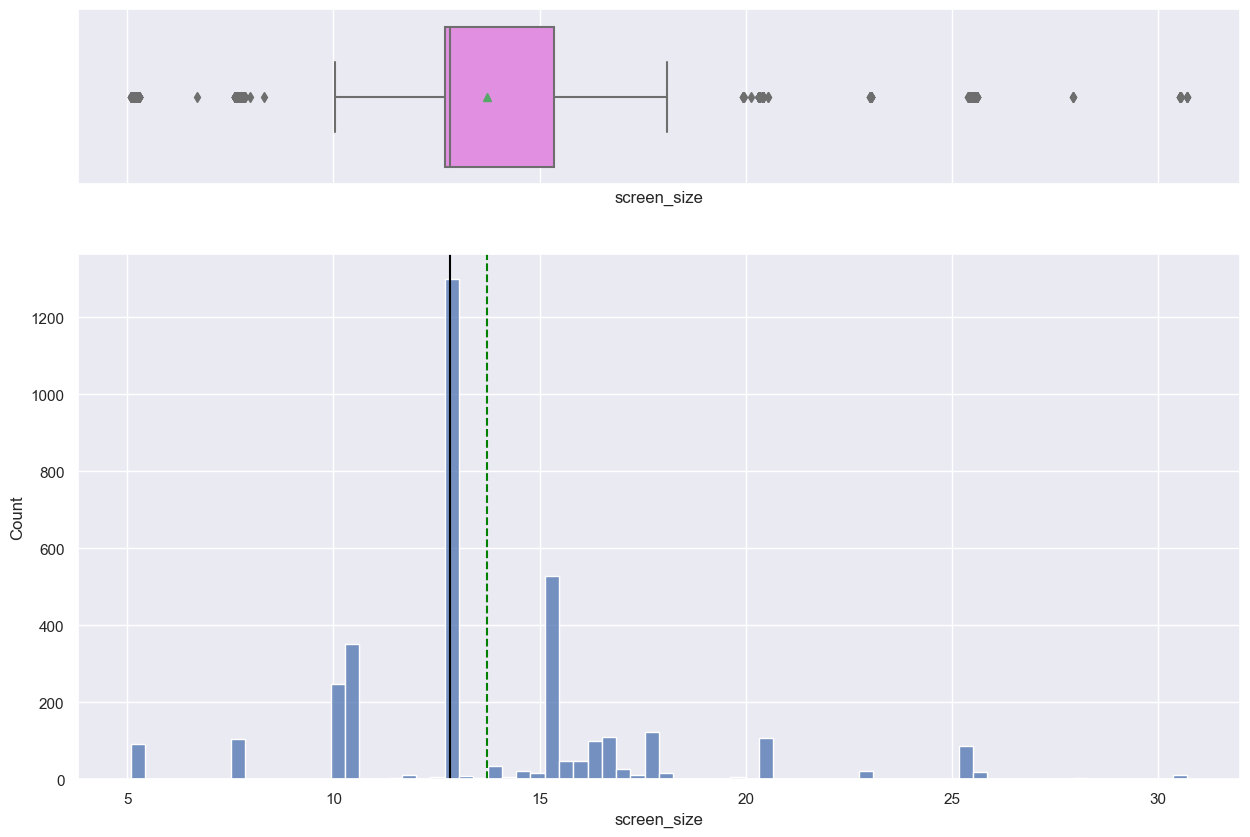

In [110]:
histogram_boxplot(dfc, 'screen_size')

#### main_camera_mp

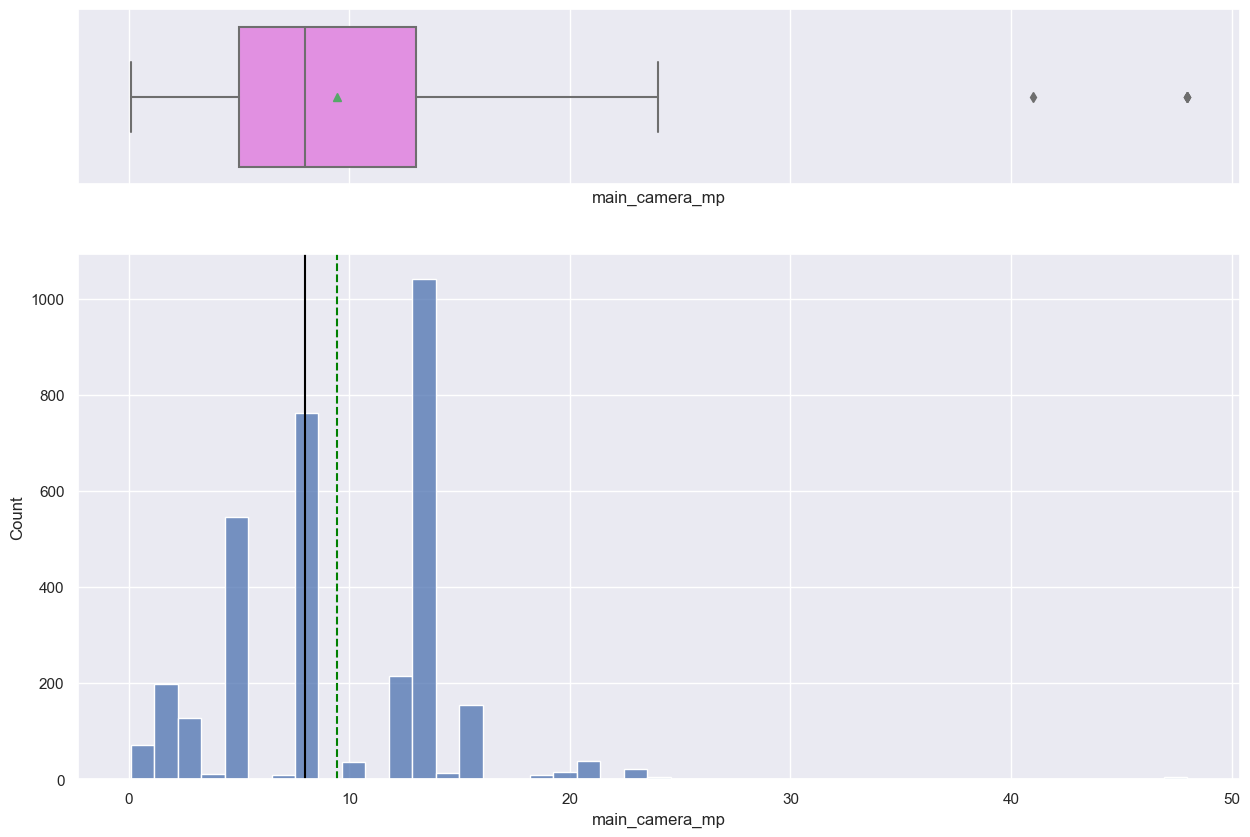

In [111]:
histogram_boxplot(dfc, 'main_camera_mp')

#### selfie_camera_mp

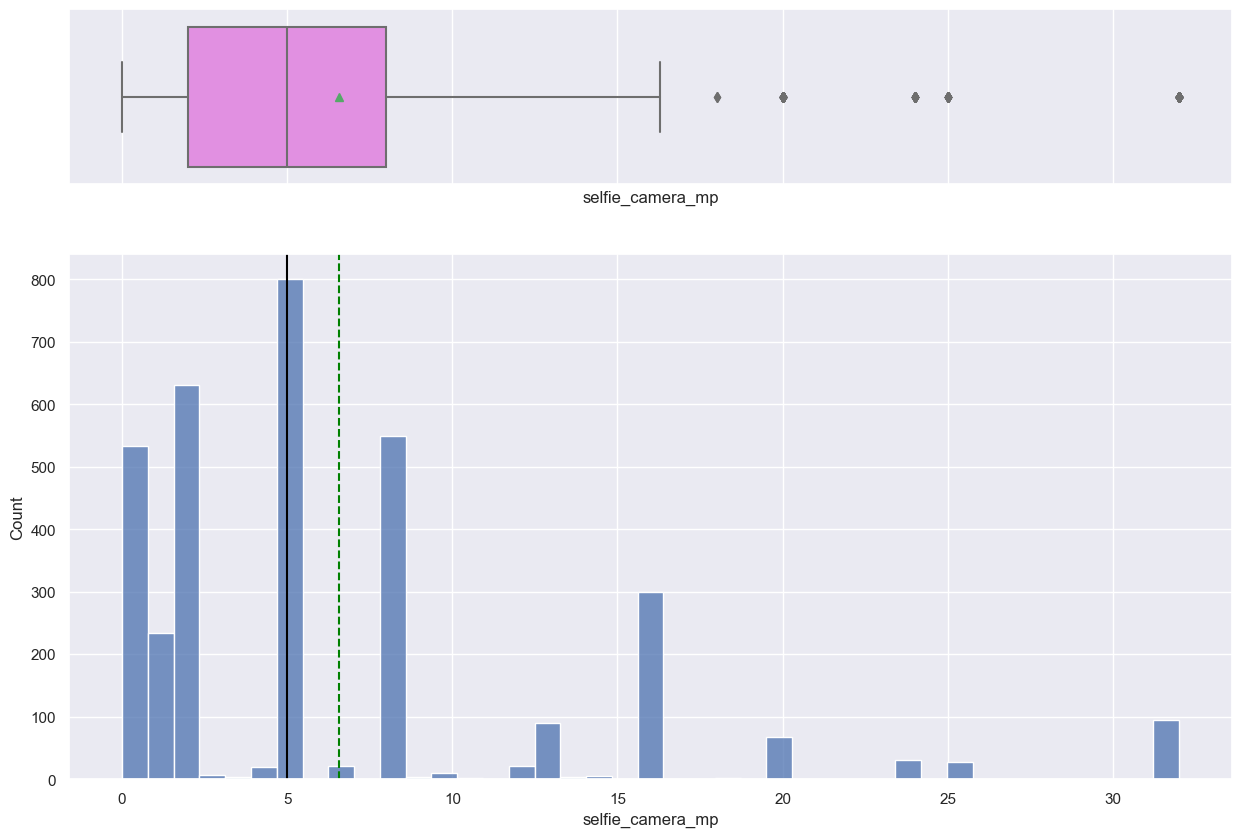

In [112]:
histogram_boxplot(dfc, 'selfie_camera_mp')

#### int_memory 

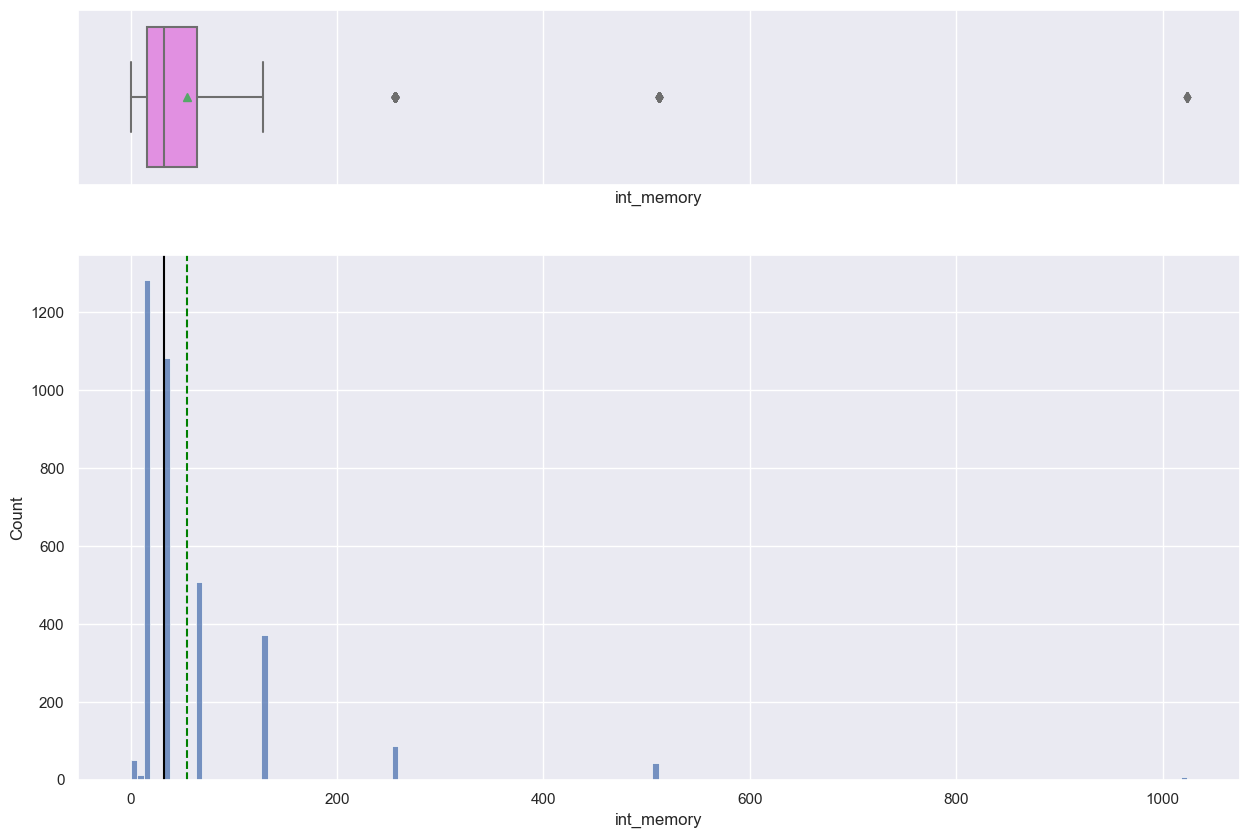

In [113]:
histogram_boxplot(dfc, 'int_memory')

#### ram

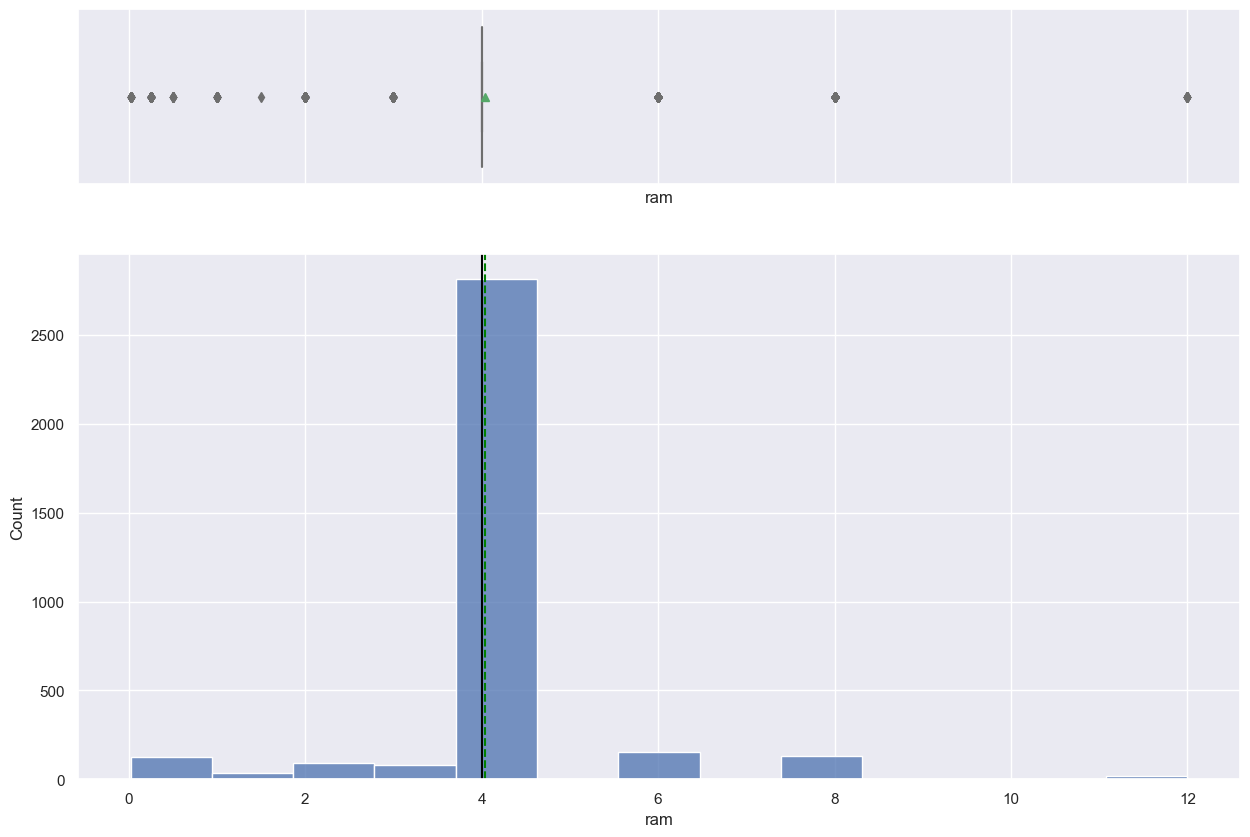

In [114]:
histogram_boxplot(dfc, 'ram')

#### battery

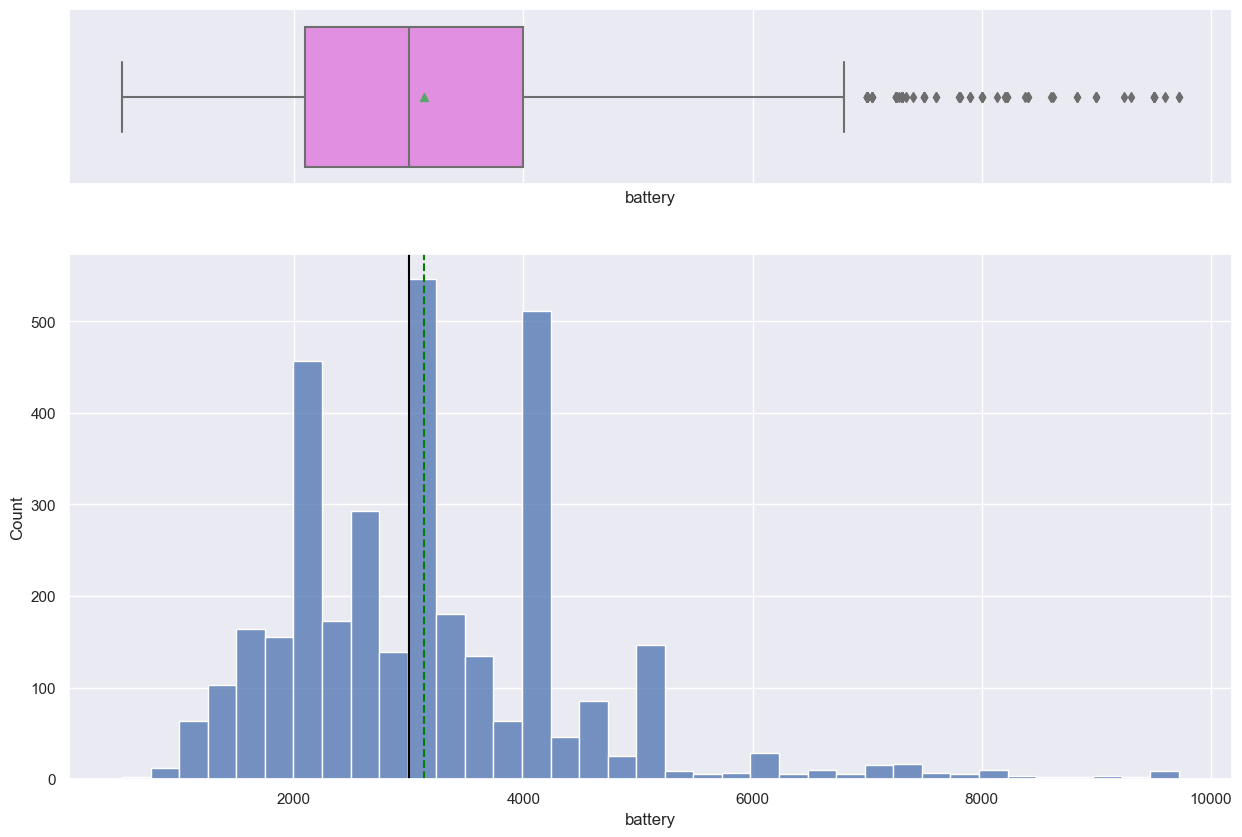

In [115]:
histogram_boxplot(dfc, 'battery')

#### weight

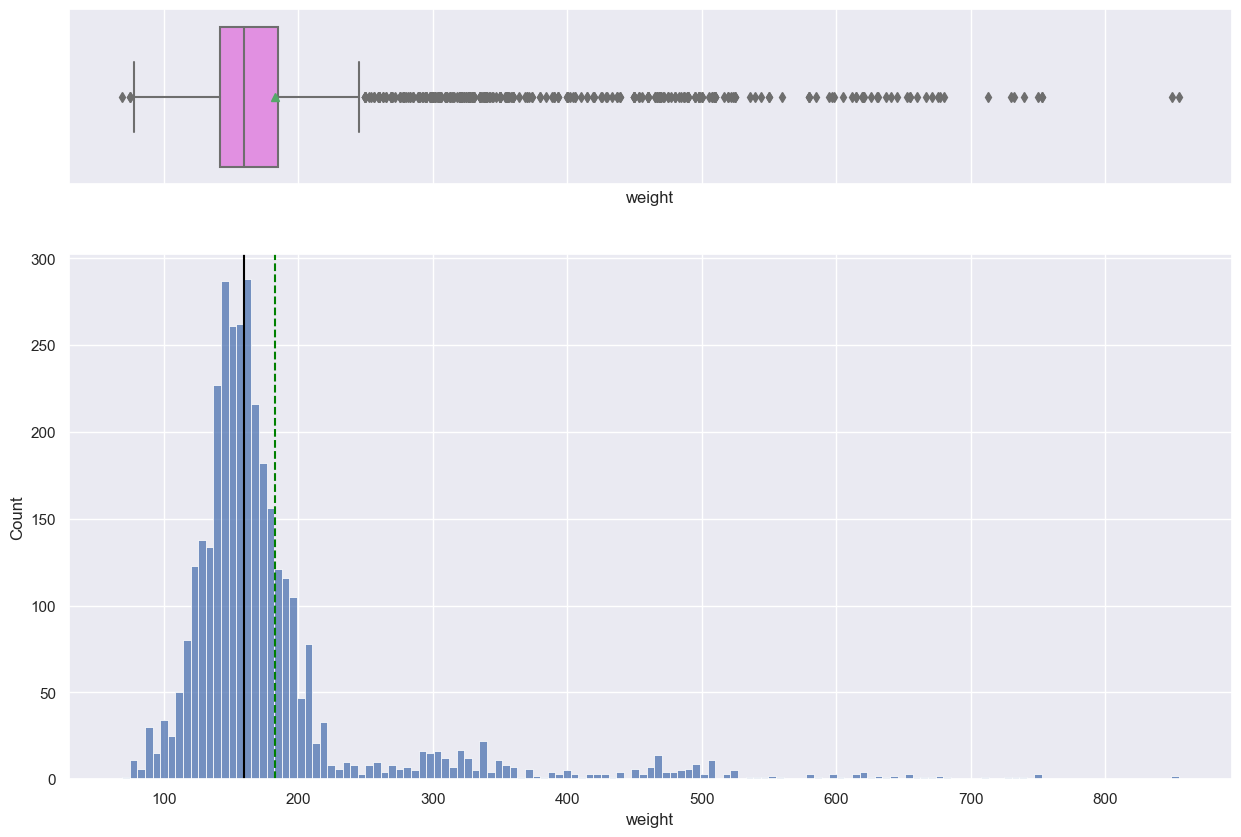

In [116]:
histogram_boxplot(dfc, 'weight')

#### days_used

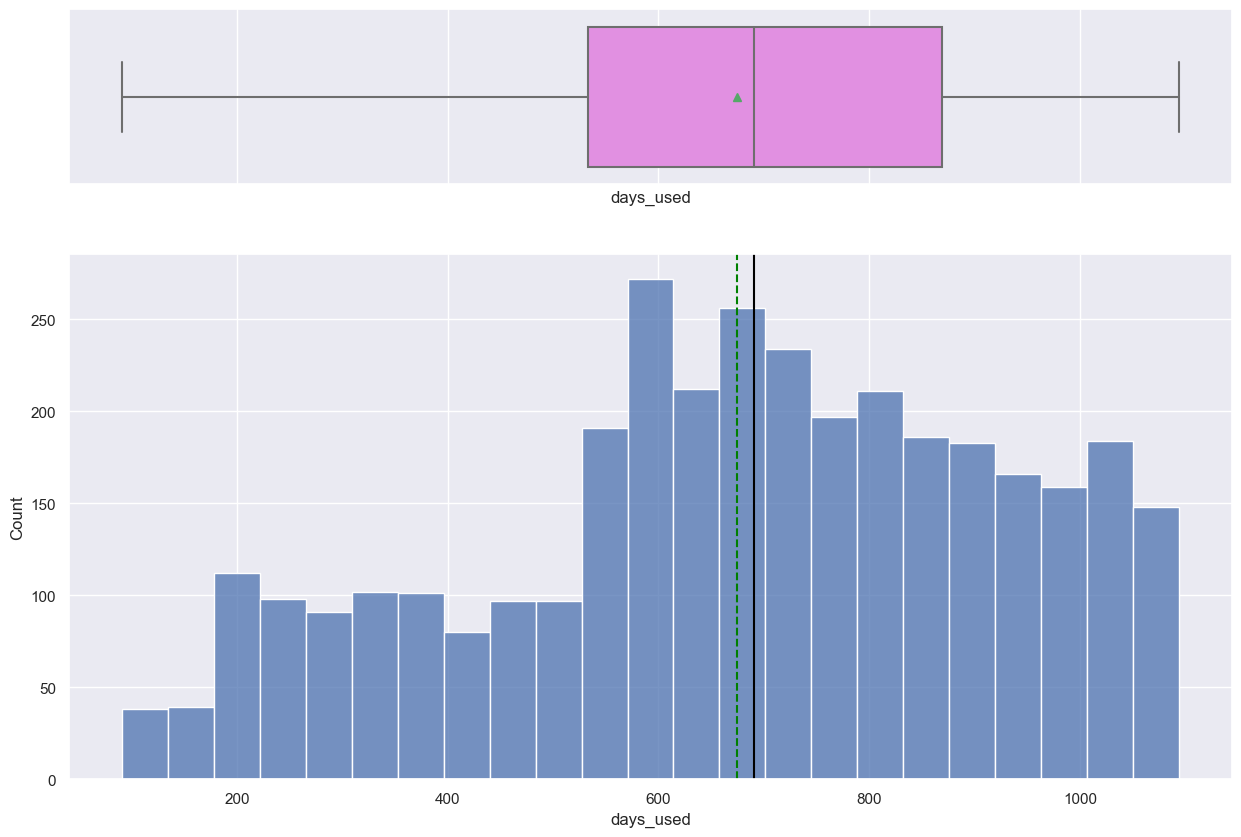

In [117]:
histogram_boxplot(dfc, 'days_used')

#### normalized_used_price

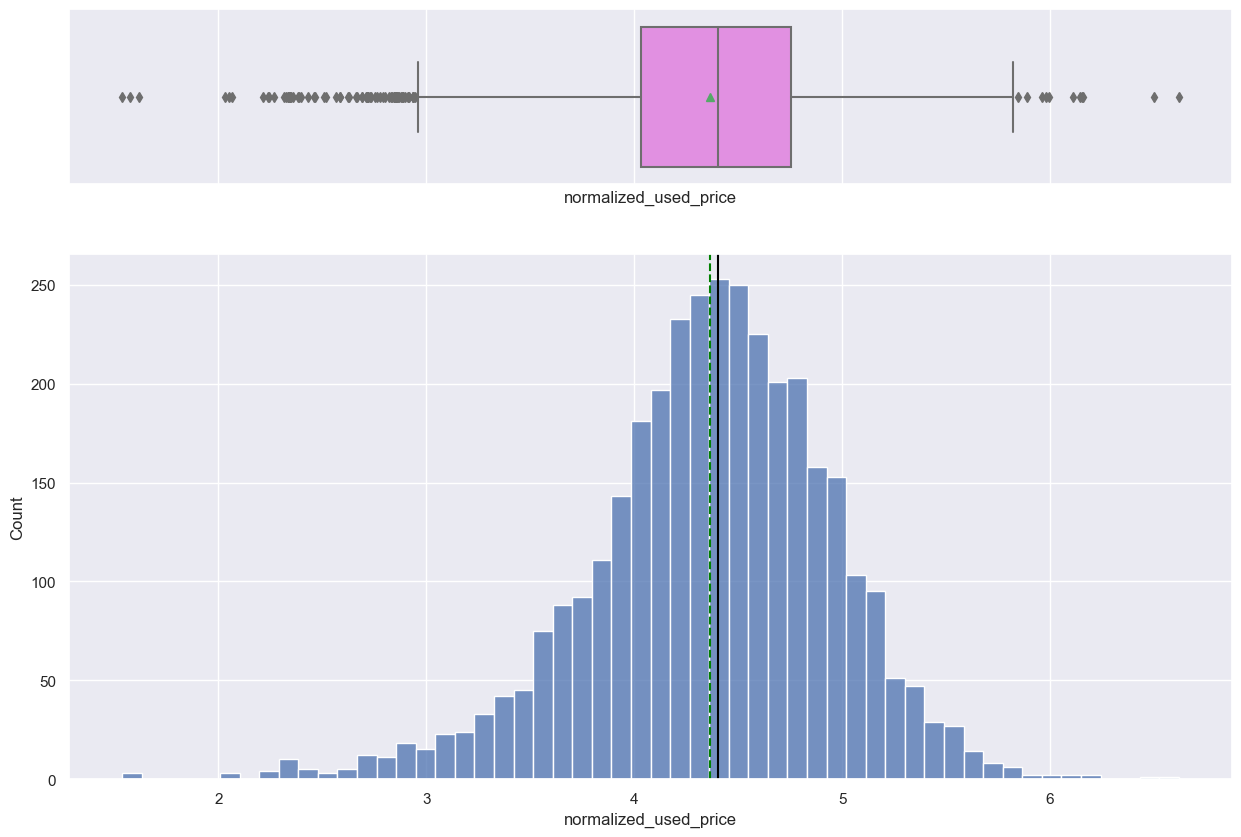

In [118]:
histogram_boxplot(dfc, 'normalized_used_price')

#### Question 1 - What does the distribution of normalized used device prices look like?

Answer: The distribution for normalized used decice seems to be a normal distribution, with a mean value around 4.36  

#### normalized_new_price

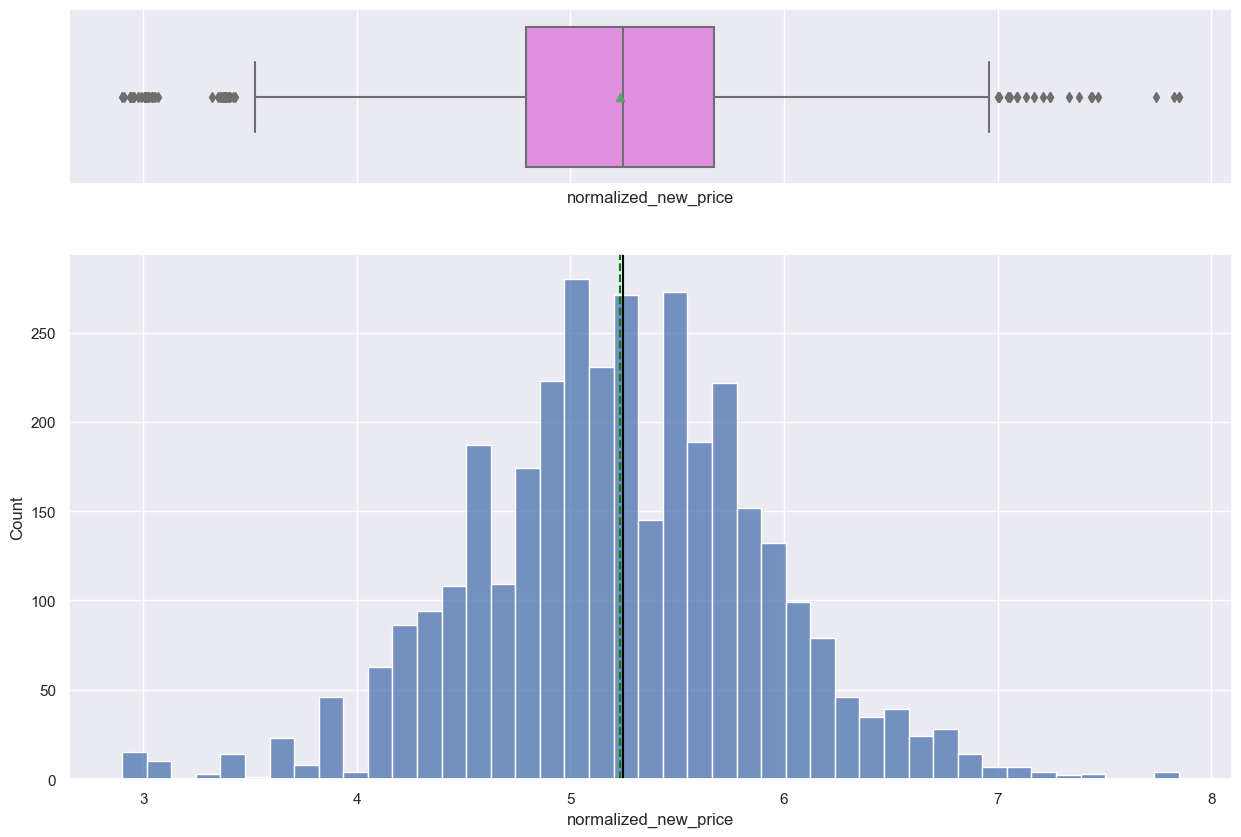

In [119]:
histogram_boxplot(dfc, 'normalized_new_price')

#### brand_name

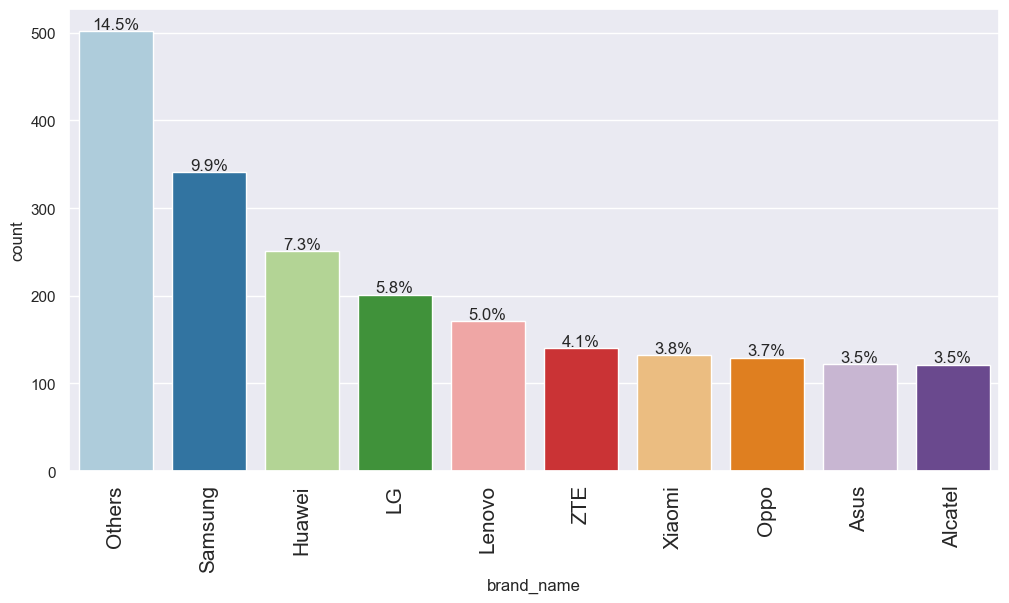

In [120]:
labeled_barplot(dfc, "brand_name", perc=True, n=10)

#### os

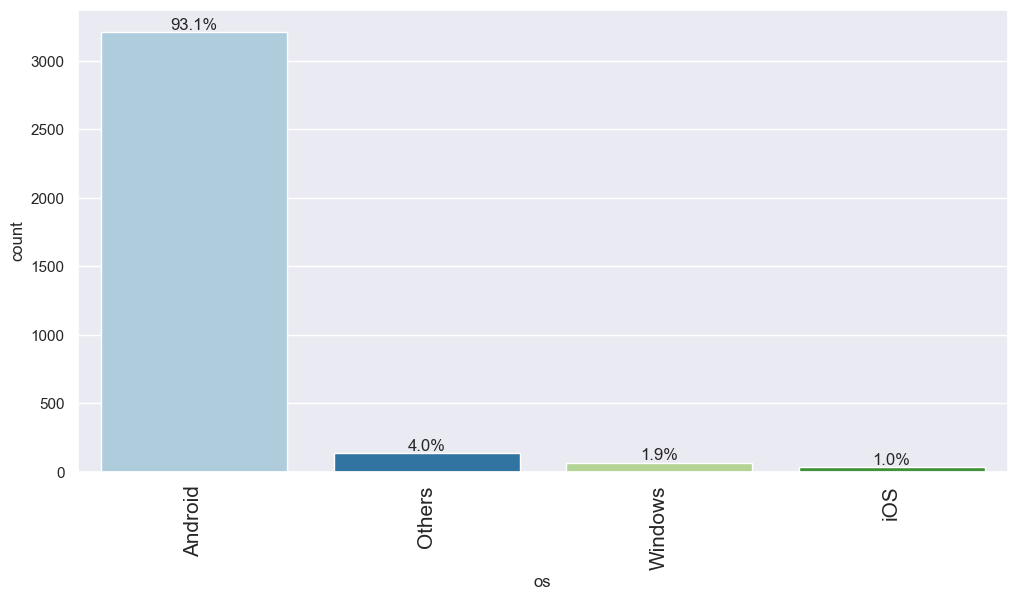

In [121]:
labeled_barplot(dfc, "os", perc=True, n=10)

#### Question 2 What percentage of the used device market is dominated by Android devices?

Answer: Android dominates the used device market share, with a close to 93% market share

#### 4g

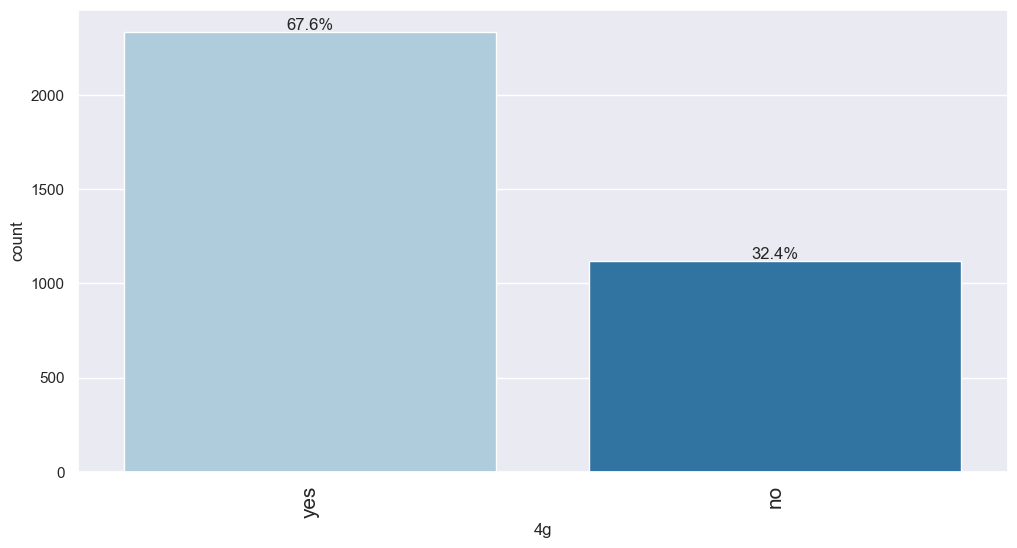

In [122]:
labeled_barplot(dfc, "4g", perc=True, n=10)

#### 5g

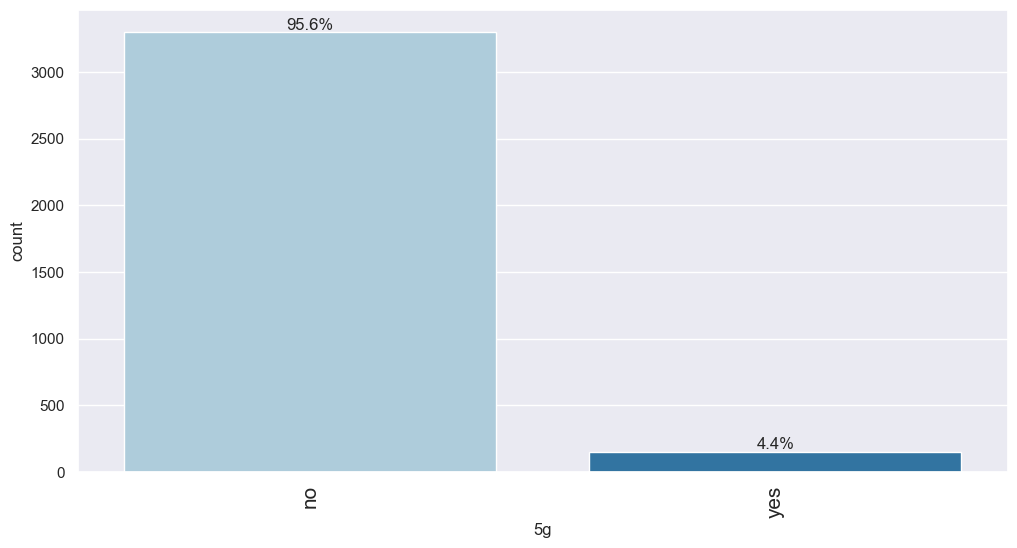

In [123]:
labeled_barplot(dfc, "5g", perc=True, n=10)

####  release_year

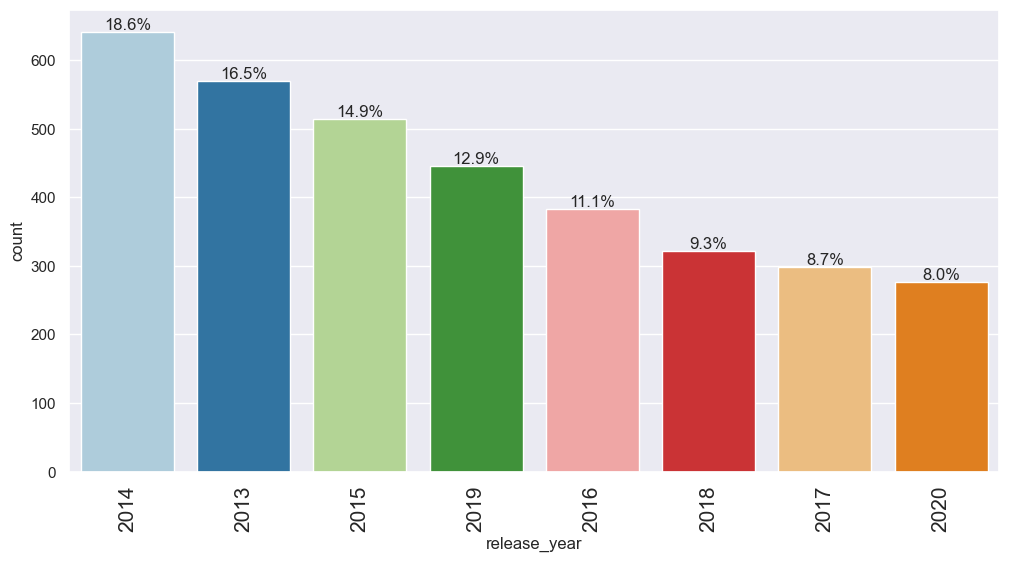

In [124]:
labeled_barplot(dfc, "release_year", perc=True, n=10)

### Bivariate Analysis

#### Correlation Check among numerical variables

In [125]:
# coming up the numerical column list: 
column_list = dfc.select_dtypes(include=np.number).columns.tolist()
column_list

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

In [126]:
# dropping release_year as it is just a year or time holder, a temporal variable
column_list.remove('release_year')


In [127]:
column_list

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

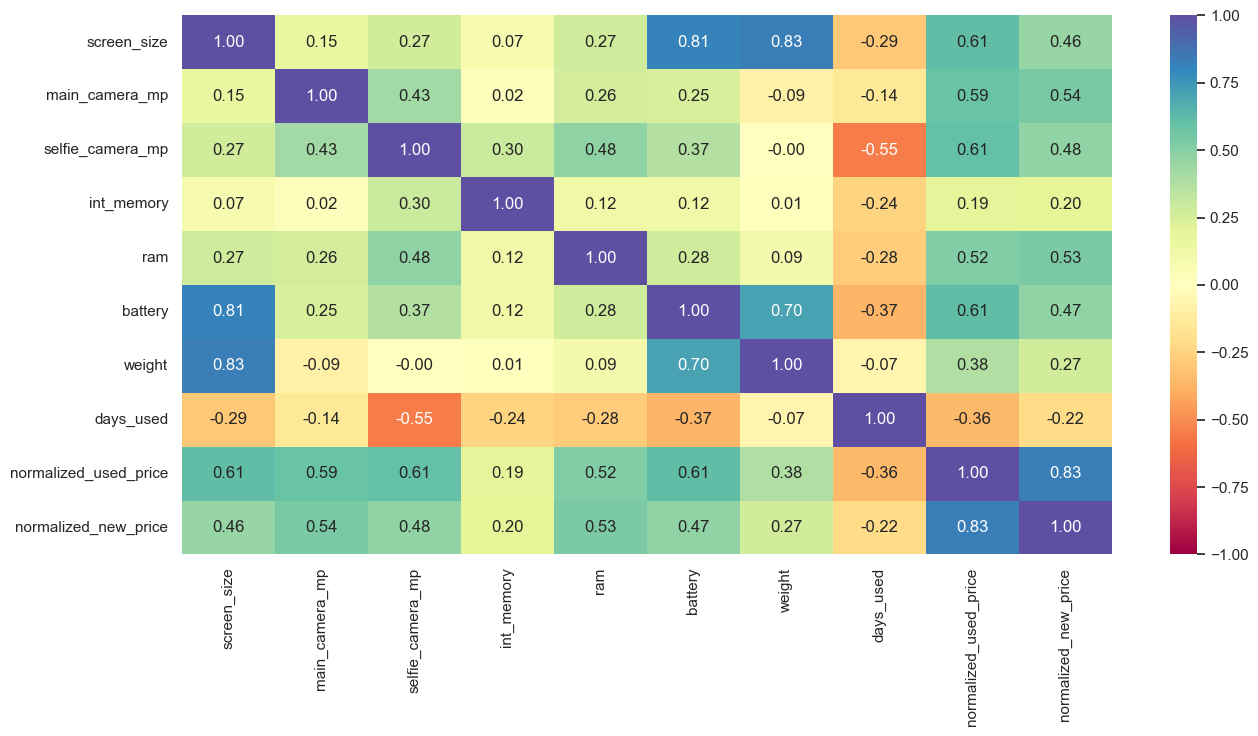

In [128]:
#column_list.remove('release_year')

plt.figure(figsize=(15, 7))
sns.heatmap(
    dfc[column_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Question 7 - Which attributes are highly correlated with the normalized price of a used device?

Based on the above correlatin heatmap, normalized price of a used device is mostly correlated with normalized new device price at 0.83, followed by screen size and battery at 0.61, and main camera mp at 0.54. 

#### RAM vs brand

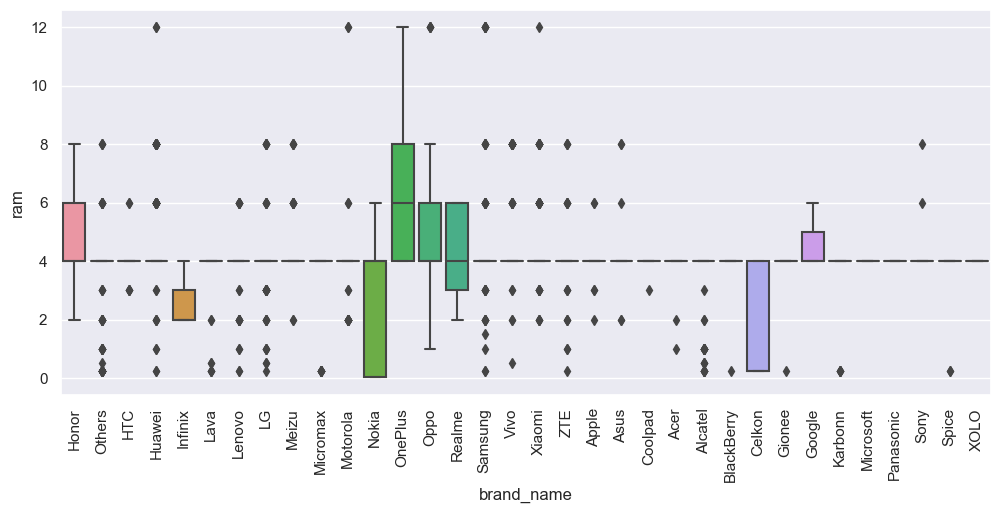

In [129]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dfc, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

#### Question 3 The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

Answer: The RAM for different brands fall within 0.02 to 12.0 GB range, with Huawei, Motorola, Oneplus, Oppo, Samsung, and Xiaomi all offer 12GB as the option; while Apple offers only 1, 2, and 4GB options. 

#### Internal memory

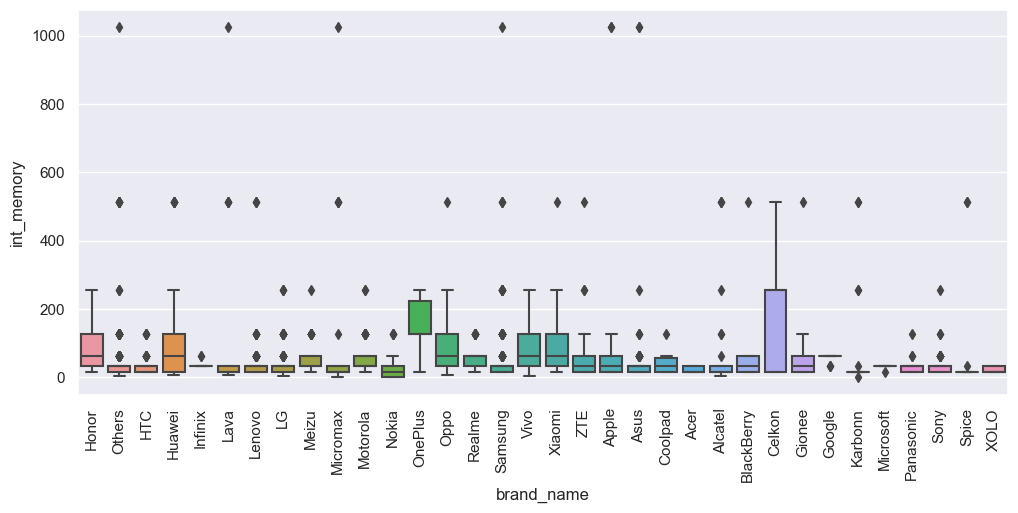

In [130]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dfc, x="brand_name", y="int_memory")
plt.xticks(rotation=90)
plt.show()

#### battery vs brand name

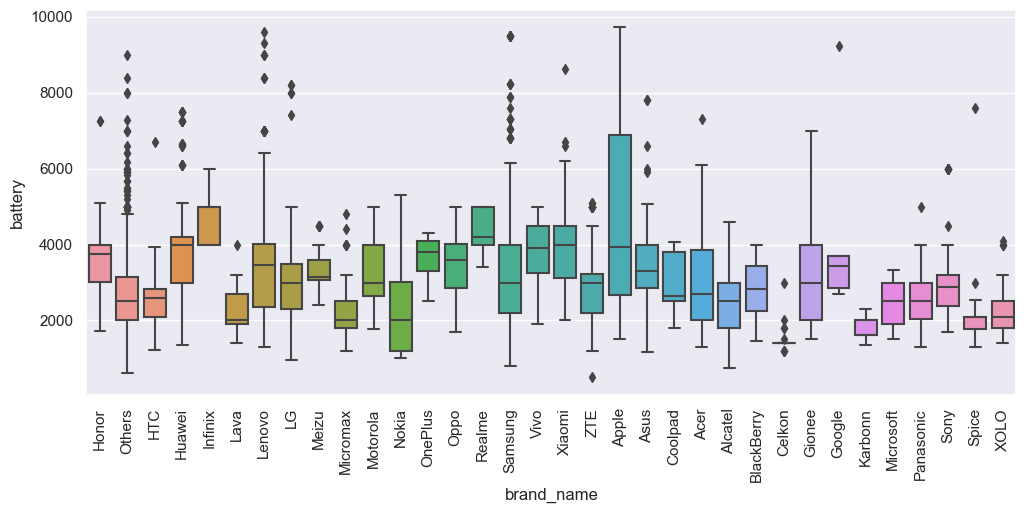

In [131]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dfc, x="brand_name", y="battery")
plt.xticks(rotation=90)
plt.show()

#### weight vs brand name

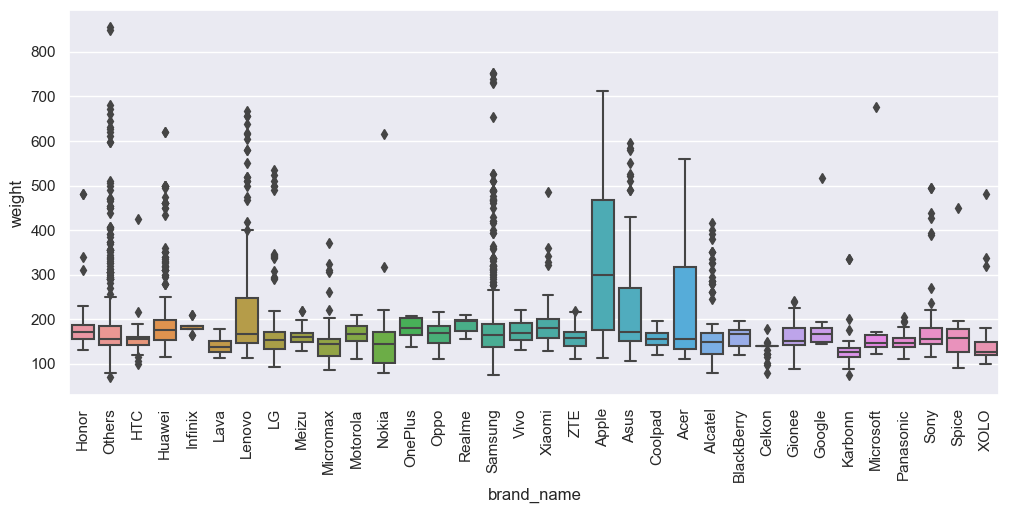

In [132]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dfc, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

#### Question 4 - A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

Answer: to answer this question, I need to generate a new dataframe with battery more than 4500 mAh

In [133]:
df_large_battery = dfc[dfc.battery > 4500]
df_large_battery.shape

(341, 15)

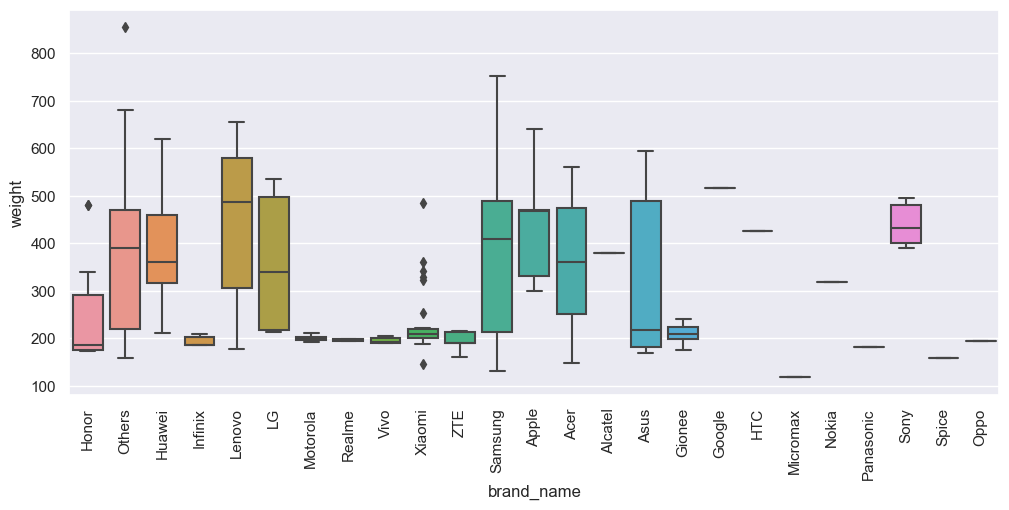

In [134]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight") 
plt.xticks(rotation=90)
plt.show()

Answer: the average weight of the phone with large battery is about 400 grams, with 15 brands availabe. Samsung seems to have the broader offering, with the heavist unit at 760 grams; while Lenovo is the next in line with ther highest mean value for the weight of the phone with the longer battery life.

#### screen_size vs brand name

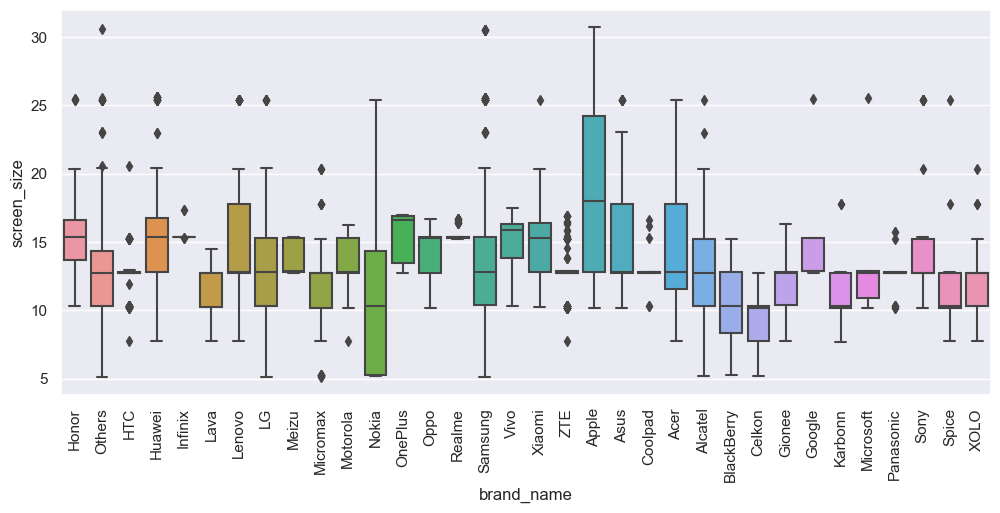

In [135]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dfc, x="brand_name", y="screen_size")
plt.xticks(rotation=90)
plt.show()

#### Question 5 - Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

To answer this question, I need to generate a new dataframe with screen size bigger than 6 inches

In [136]:
df_large_screen = df[dfc.screen_size > 6 * 2.54]  ## convert inch to centimeter
df_large_screen.shape

(1099, 15)

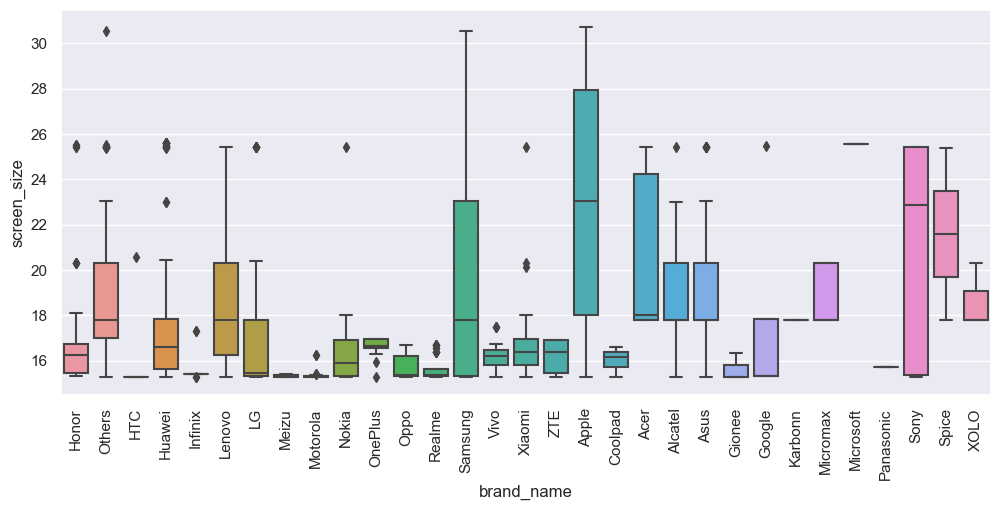

In [137]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_large_screen, x="brand_name", y="screen_size")
plt.xticks(rotation=90)
plt.show()

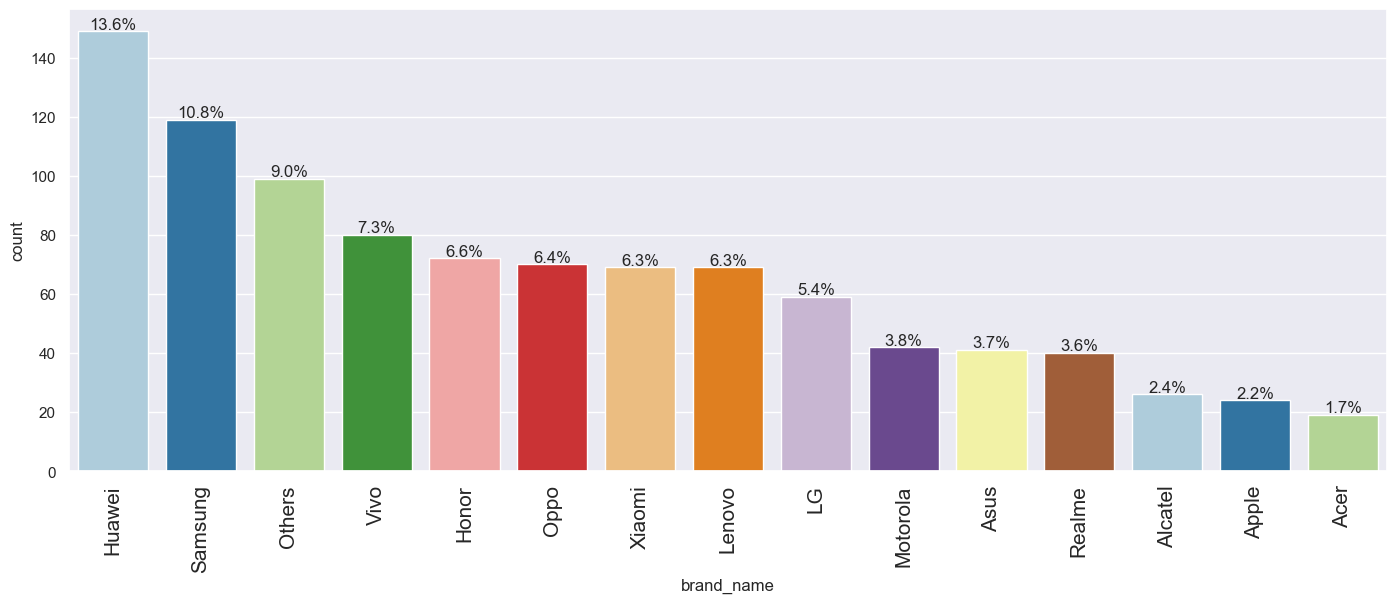

In [138]:
# or using the labeled barplot
labeled_barplot(df_large_screen, "brand_name", perc=True, n=15)


Answer: There are 15 brands availabe with the screen size bigger than 6 inches. Huawei has the biggest market share at 13.6%, Samsung coming next at 10.8%. Apple and Samsung seem to stand out with the options in the largest size of the phone or tablets over 30 cm, while Sony also have a broader offering. have the broader offering.

#### main camera vs brand name

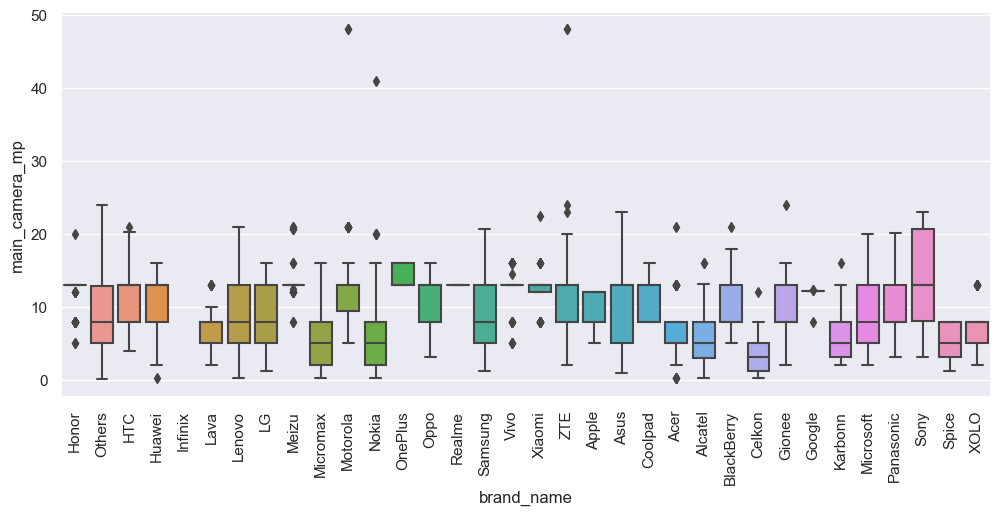

In [139]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="brand_name", y="main_camera_mp")
plt.xticks(rotation=90)
plt.show()

#### front camera vs brand name

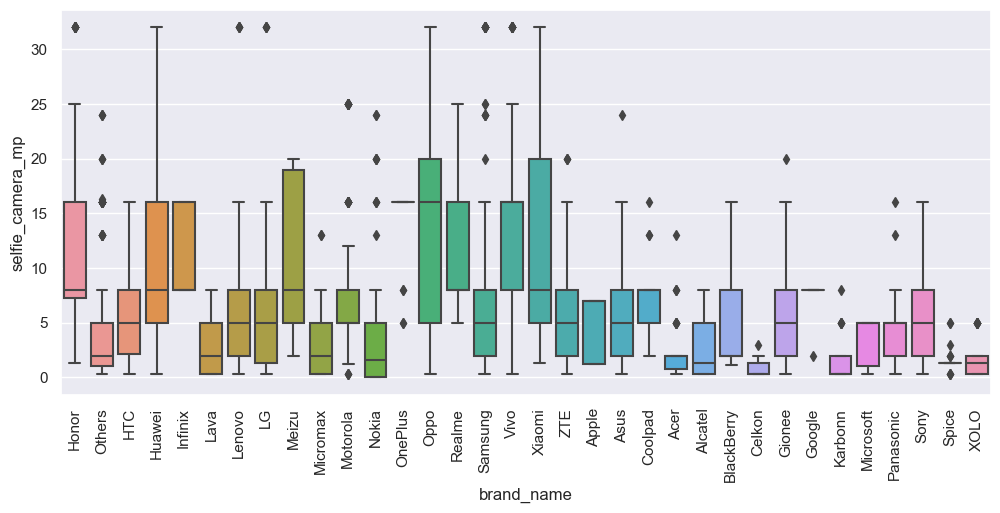

In [140]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dfc, x="brand_name", y="selfie_camera_mp")
plt.xticks(rotation=90)
plt.show()

#### Questrion 6 - A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

To answer this question, I need to generate a new dataframe with selfie camera mp larger than 8

In [141]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

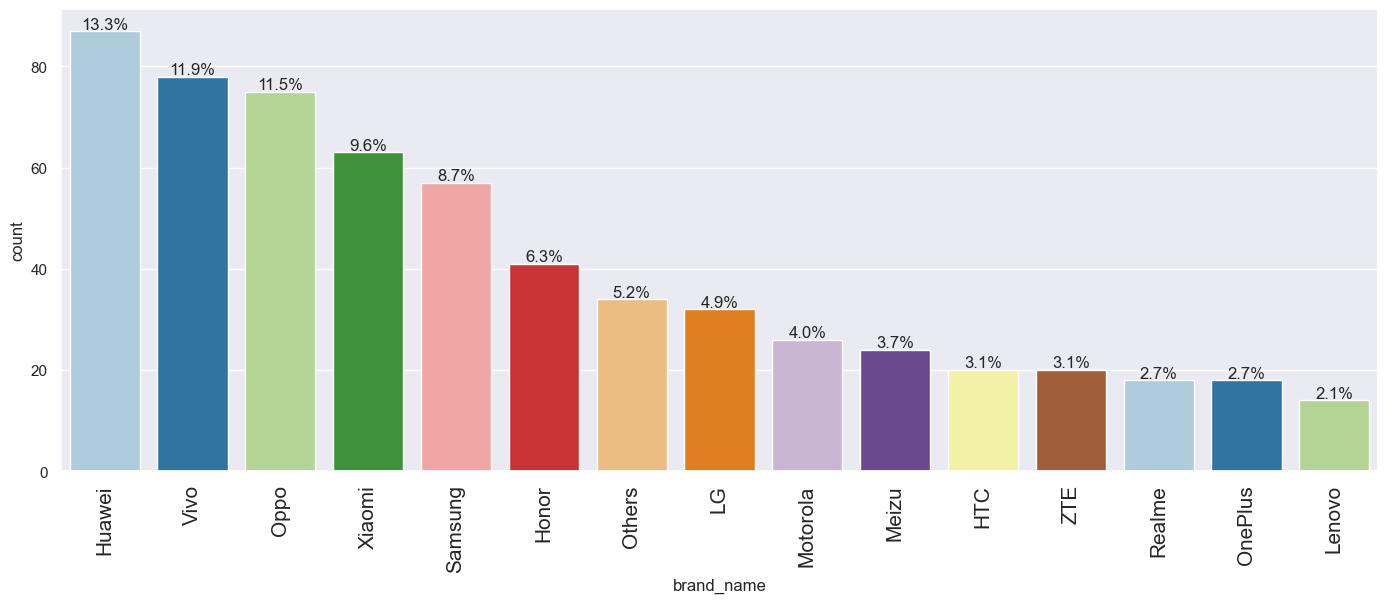

In [142]:
#using the labeled barplot
labeled_barplot(df_selfie_camera, "brand_name", perc=True, n=15)

Answer: There are 15 brands availabe with the selfie camera mp of 8 or greater. Huawei again comes as the biggest market share at 13.3%, followed by Vivo and Oppo at 11.9% adn 11.5%, respectively. Samsung coming at fifth 8.7%. Interesting Apple is not even on the list. 

#### normalized_new_price vs brand names

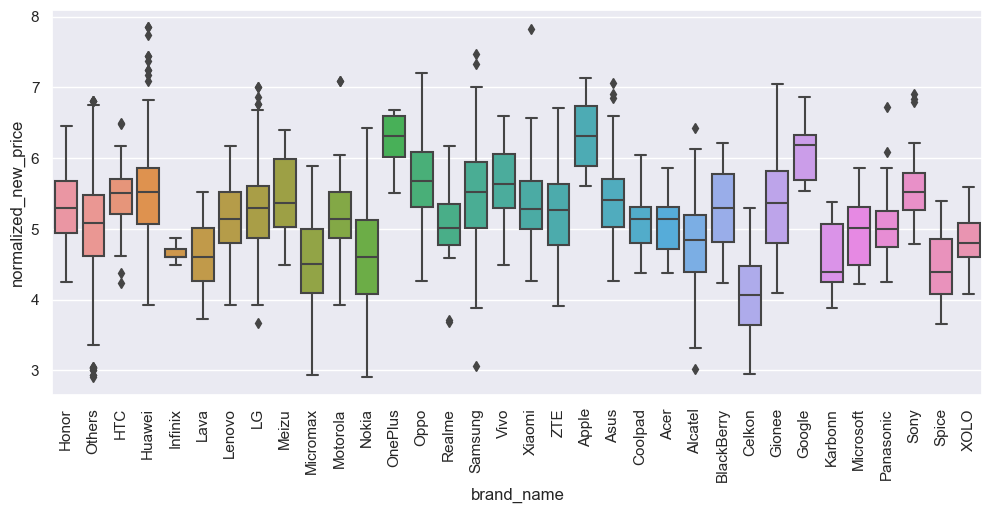

In [143]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dfc, x="brand_name", y="normalized_new_price")
plt.xticks(rotation=90)
plt.show()

#### normalized_used_price vs brand names

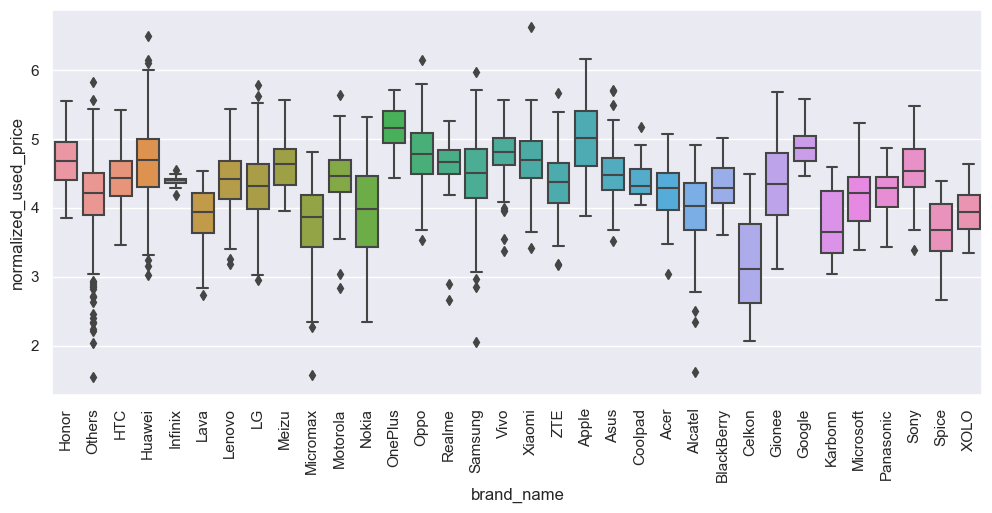

In [144]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dfc, x="brand_name", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

#### normalized_used_price vs os

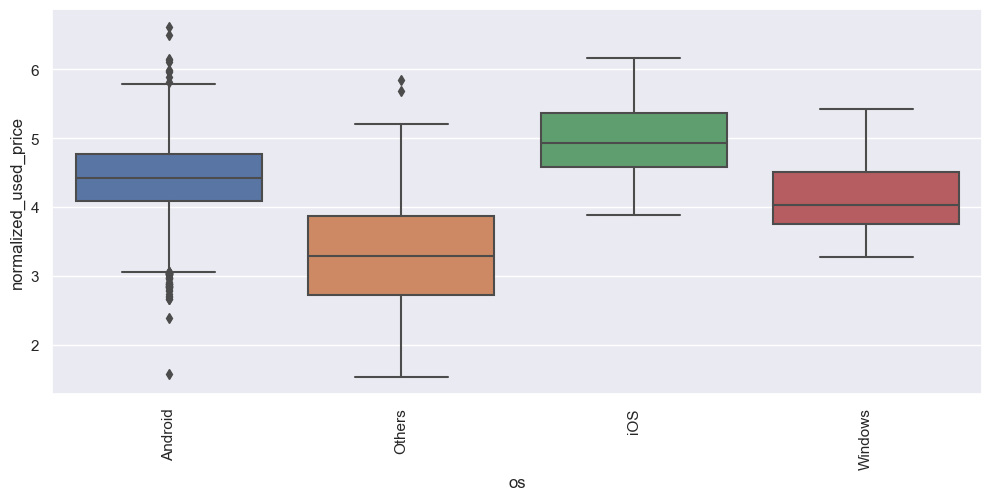

In [145]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dfc, x="os", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

#### normalized_new_price vs os

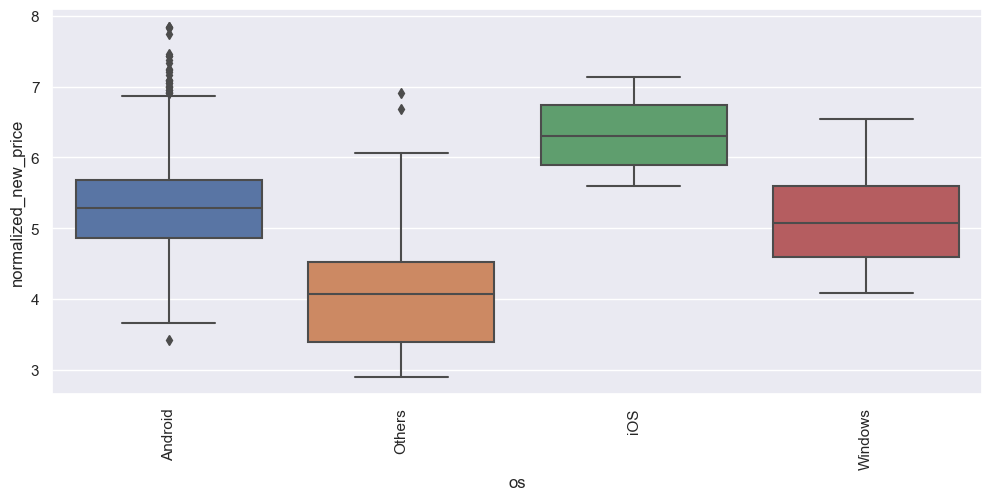

In [146]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dfc, x="os", y="normalized_new_price")
plt.xticks(rotation=90)
plt.show()

#### RAM vs os

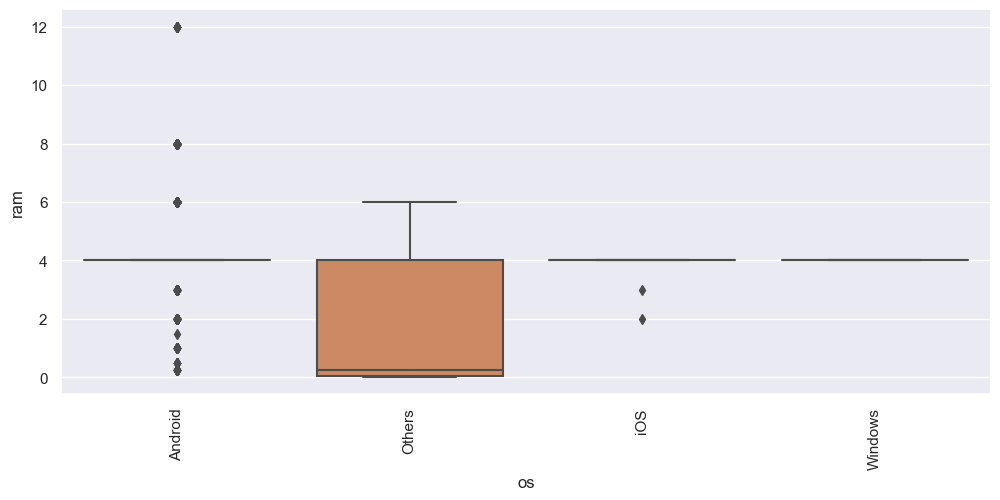

In [147]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dfc, x="os", y="ram")
plt.xticks(rotation=90)
plt.show()

#### normalized_used_price vs release_years

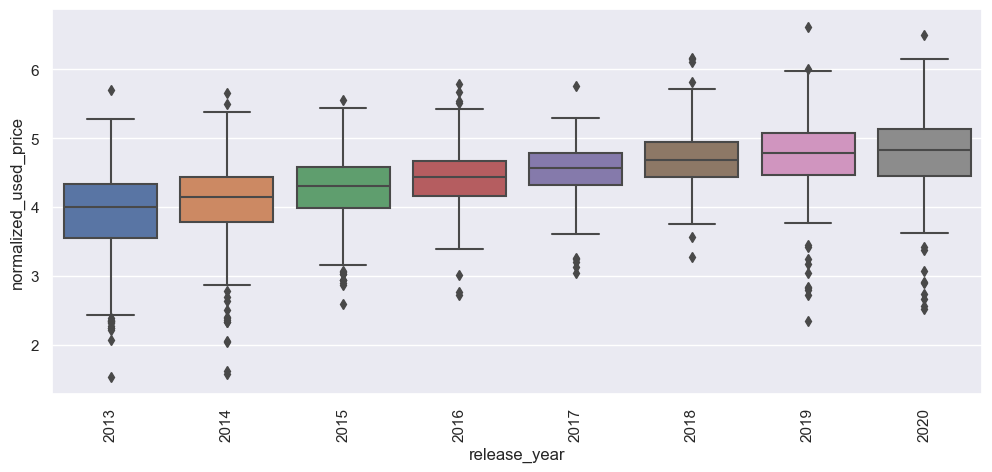

In [148]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=dfc, x="release_year", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

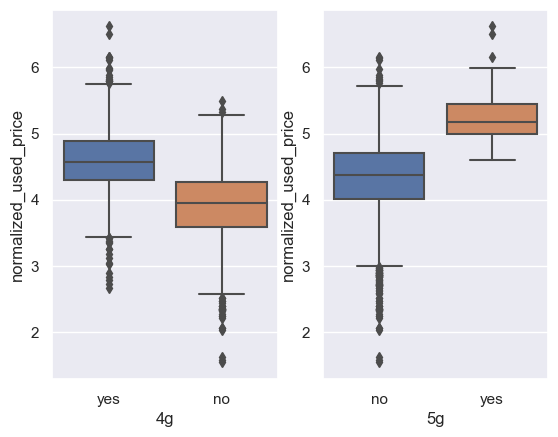

In [149]:
#### normalized_used_price vs 4g and 5gplt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing Value Imputation

I am going to adopt the approach of imputing missing values based on the median of each column, grouped by both brand_name and release_year. This method considers both the technological trends over time (as captured by the release year) and the specific characteristics associated with each brand. Different brands may have distinct technological profiles, design philosophies, and target markets, leading to variations in specifications like camera megapixels, memory, battery capacity, and weight even within the same release year. This dual-grouping strategy ensures that the imputed values are not only temporally relevant but also brand-specific, further enhancing the contextual accuracy of the dataset. 

In [150]:
# let's create a copy of the data
df3 = df.copy()

In [151]:
df3.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [152]:
# List of columns to impute missing values
columns_to_impute = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']

# Loop through each column in the list
#for column in columns_to_impute:
    # Impute missing values using the median of the column, grouped by 'brand_name' and 'release_year'
#    df1[column] = df1.groupby(['brand_name', 'release_year'])[column].transform(lambda x: x.fillna(x.median()))
    
for col in columns_to_impute:
    df3[col] = df3[col].fillna(
        value=df3.groupby(['brand_name', 'release_year'])[col].transform("median")
    ) 


In [153]:
# checking for missing values again
df3.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

I tried two different methods, but it appears that the imputation method didn't fully address all missing values, likely because some groups defined by brand_name and release_year might not have enough data to calculate a median (for example, all devices of a certain brand and release year might have missing values in the same column).

To ensure that all missing values are imputed, I am adjusting by grouping by brand name only for the the columns with null values:main_camera_mp, selfie_camera_mp, battery, weight:

In [154]:
cols_to_impute = ['main_camera_mp', 'selfie_camera_mp', 'battery', 'weight']
# Loop through each column in the list
for col in cols_to_impute:
        df3[col] = df3[col].fillna(
        value=df3.groupby(['brand_name'])[col].transform("median")
        )

In [155]:
df3.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [156]:
#for the remaining missing values in the main_camera_mp, using column by the column median
df3["main_camera_mp"] = df3["main_camera_mp"].fillna(df3["main_camera_mp"].median())

In [157]:
# checking for missing values again
df3.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [158]:
df3.shape

(3454, 15)

In [159]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3454.0,9.617597,4.749438,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3454.0,6.555067,6.968440,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3454.0,54.528474,84.934991,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3454.0,4.032620,1.368598,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3454.0,3132.577446,1298.884193,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3454.0,182.636856,88.360445,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


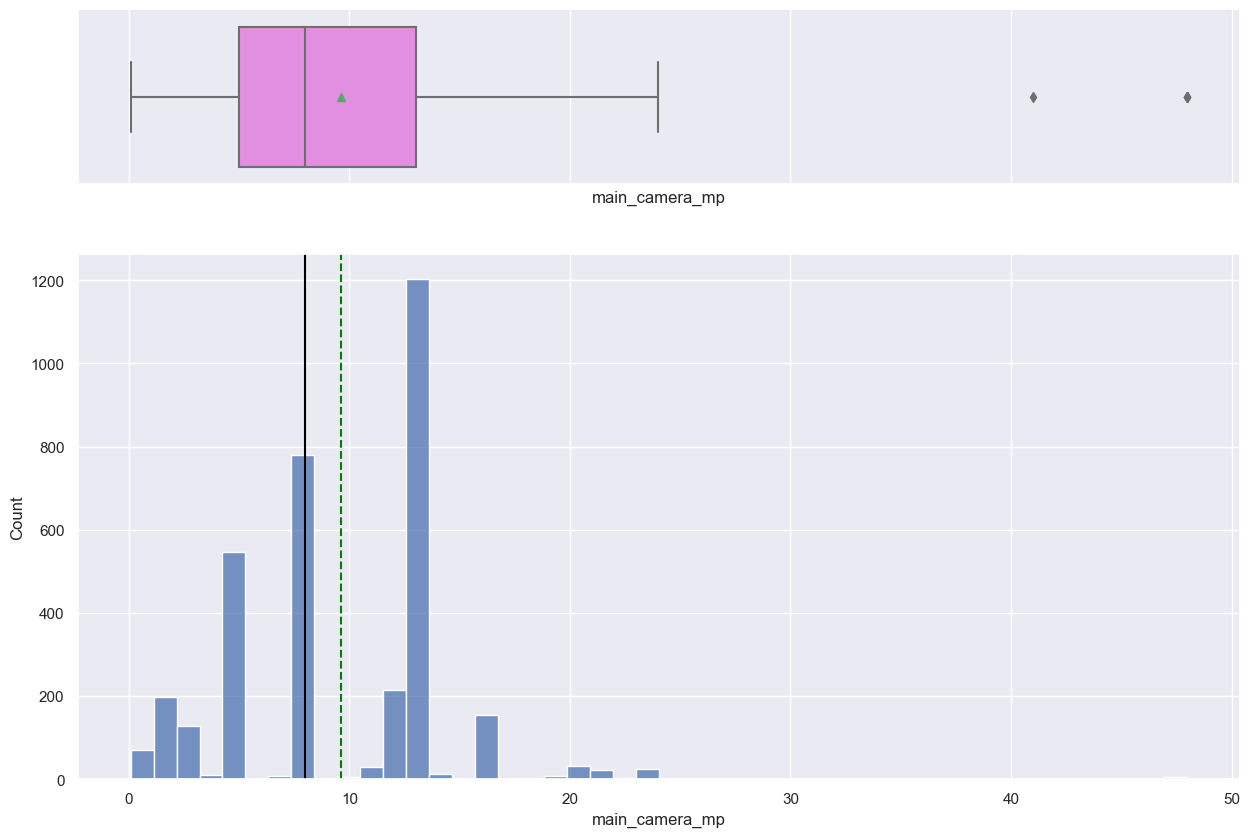

In [160]:
histogram_boxplot(df3, 'main_camera_mp')

#### checking outlier for the numerical columns

C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\1558445708.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\1558445708.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\1558445708.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\1558445708.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\1558445708.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\1558445708.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\1558445708.py:9: UserWarning: The figure layout has changed to tight
  plt.tight

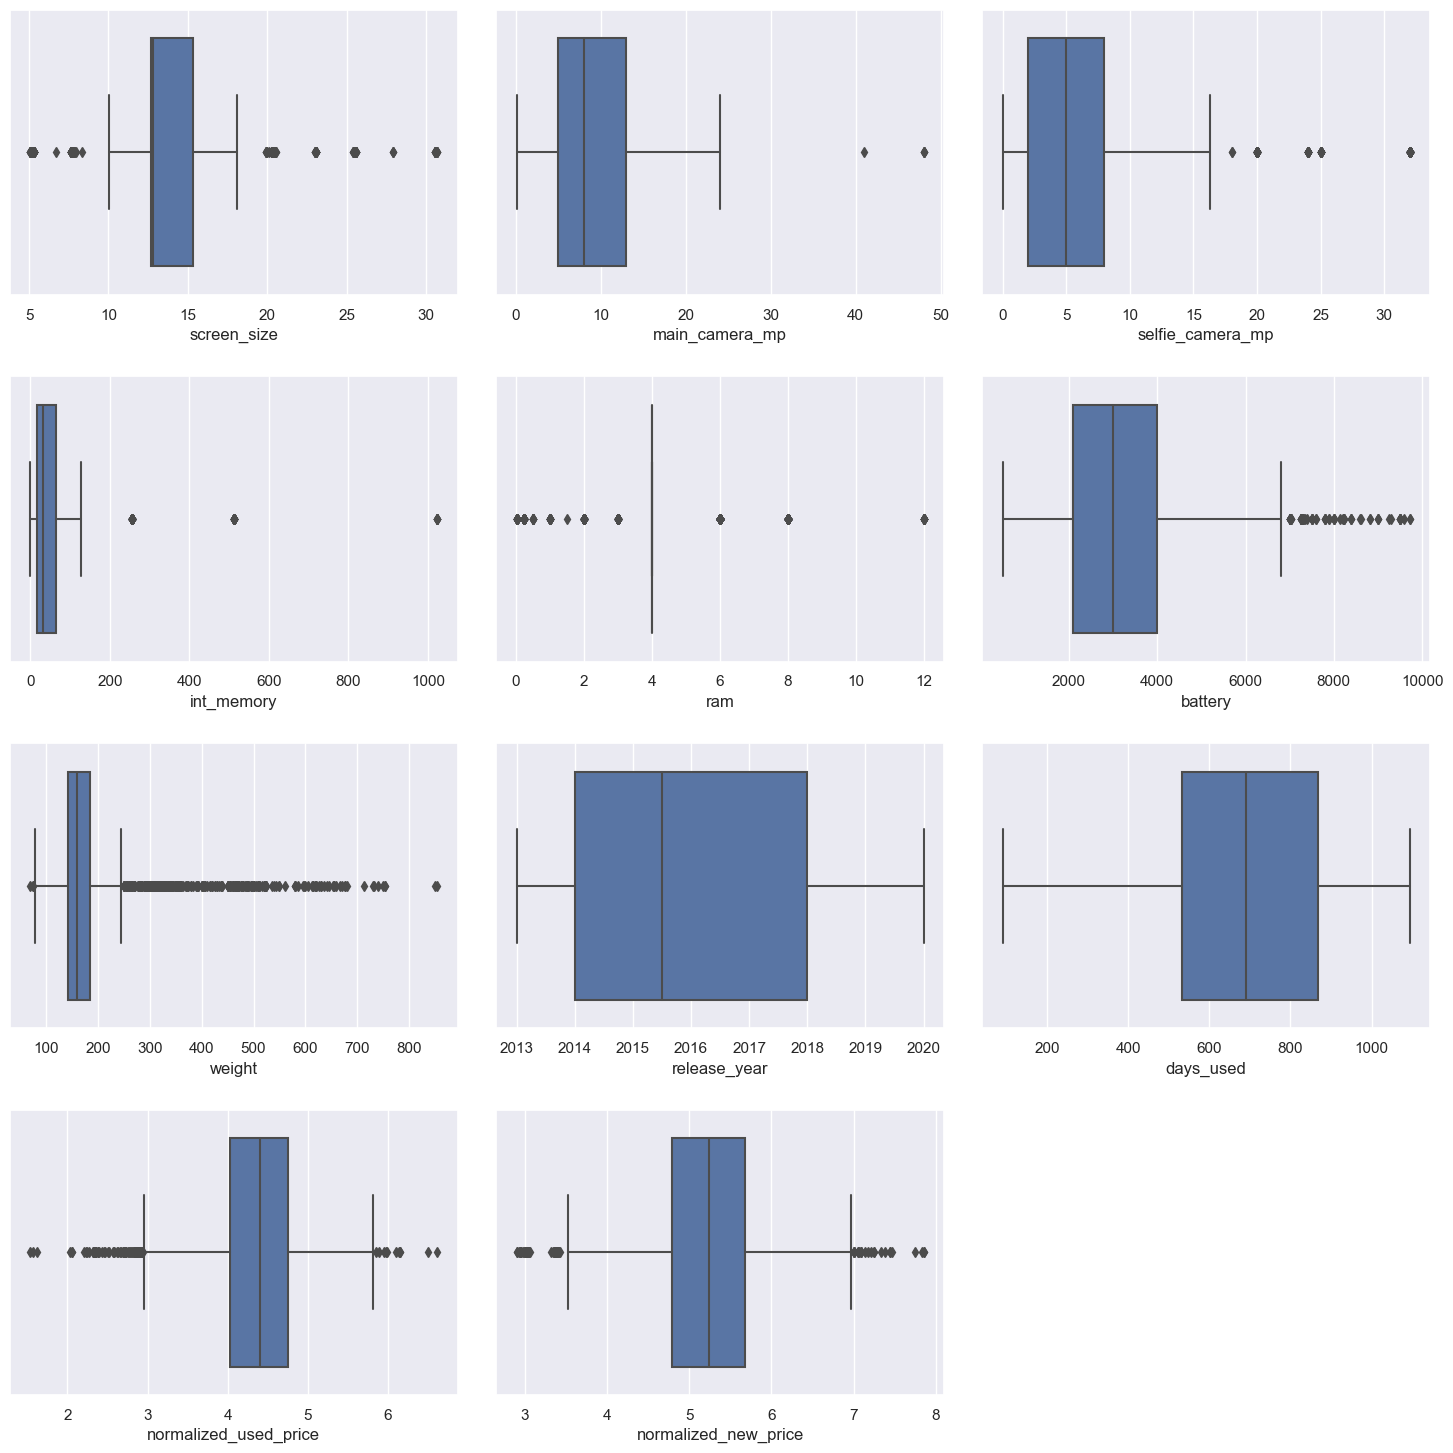

In [161]:
# outlier detection using boxplot
num_cols = df3.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df3, x=variable)
    plt.tight_layout(pad=2)

plt.show()

#### create a new column years_since_release from the release_year column. Using 2021 as the baseline, and drop the release_year column.

In [162]:
df3["years_since_release"] = 2021 - df3["release_year"]
df3.drop("release_year", axis=1, inplace=True)
df3["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\3026520367.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\3026520367.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\3026520367.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\3026520367.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\3026520367.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\3026520367.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\jianb\AppData\Local\Temp\ipykernel_28804\3026520367.py:9: UserWarning: The figure layout has changed to tight
  plt.tight

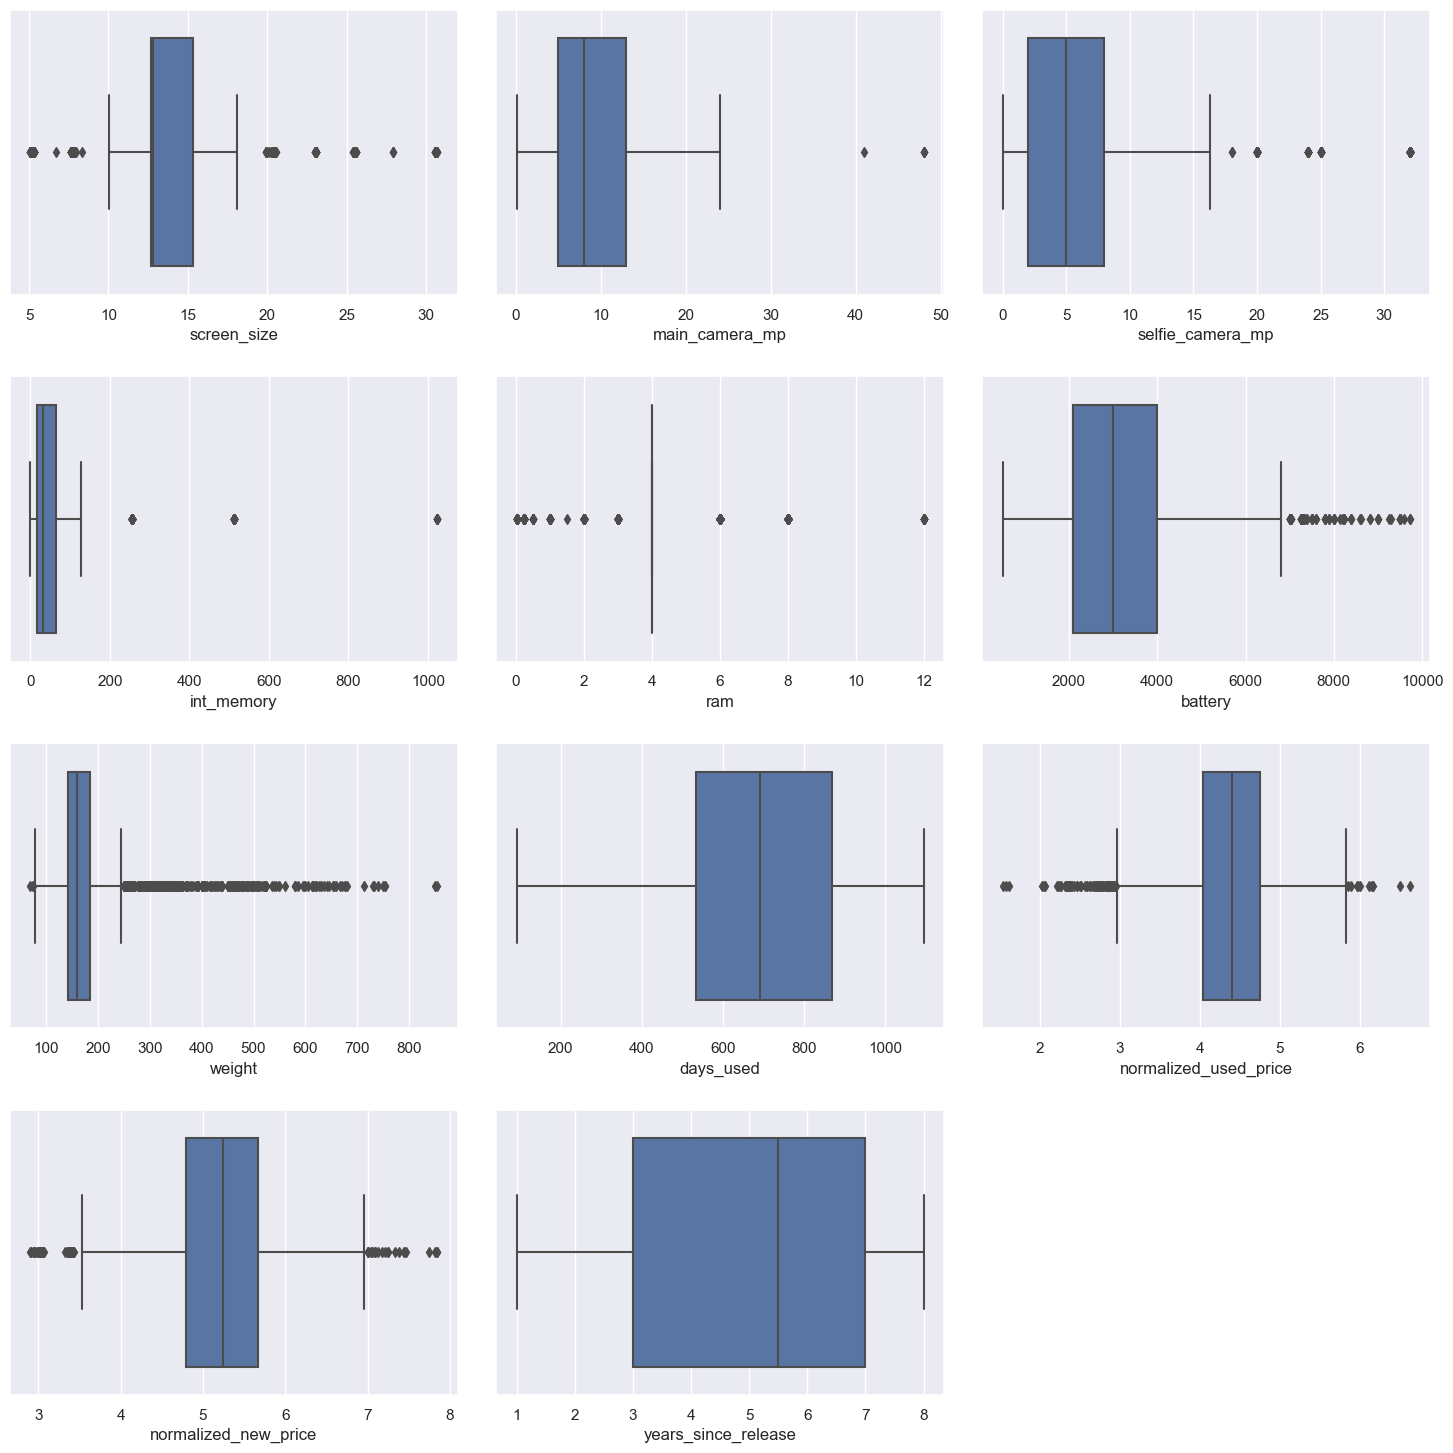

In [163]:
# Do the outlier detection using boxplot again
num_cols = df3.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df3, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Data Preparation for modeling

The goal is to predict the normalized price of used devices, need to split the data and set X and Y variables.

In [164]:
# splitting the data into the dependent and independent variables
X = df3.drop("normalized_used_price", axis=1)
y = df3["normalized_used_price"]
print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [165]:
# this adds the constant term to the dataset
X = sm.add_constant(X)

In [166]:
# creating dummy variables for independent features
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True, dtype = int
)  

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [167]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [168]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [169]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                           14:45:48   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [170]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [171]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [172]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

##### checking the following Linear Regression assumptions:

No Multicollinearity

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

#### TEST FOR MULTICOLLINEARITY

Perform test for multicollinearity using VIF.

General Rule of thumb:

If VIF is 1 then there is no correlation between the 𝑘th predictor and the remaining predictor variables.
If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [173]:
# function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [174]:
checking_vif(X_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


### Removing Multicollinearity

To remove multicollinearity

Drop every column one by one that has a VIF score greater than 5.
Look at the adjusted R-squared and RMSE of all these models.
Drop the variable that makes the least change in adjusted R-squared.
Check the VIF scores again.
Continue till you get all VIF scores under 5.
Let's define a function that will help us do this.

In [175]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {  
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [176]:
col_list = ["screen_size", "weight", "brand_name_Apple","brand_name_Huawei","brand_name_Others","brand_name_Samsung","os_iOS" ]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.841809,0.232201
1,brand_name_Huawei,0.841808,0.232201
2,brand_name_Others,0.841806,0.232203
3,os_iOS,0.841795,0.232211
4,brand_name_Samsung,0.841774,0.232227
5,screen_size,0.838381,0.234703
6,weight,0.838071,0.234928


In [177]:
col_to_drop = "brand_name_Apple"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

In [178]:
# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,227.303871
1,screen_size,7.643583
2,main_camera_mp,2.284429
3,selfie_camera_mp,2.791121
4,int_memory,1.364138
5,ram,2.273686
6,battery,4.079720
7,weight,6.394014
8,days_used,2.659799
9,normalized_new_price,3.102417


In [179]:
#run the above again for remaining columns with high VIF values
col_list1 = ["screen_size", "weight", "brand_name_Huawei","brand_name_Others","brand_name_Samsung"]

res = treating_multicollinearity(X_train2, y_train, col_list1)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.841875,0.232152
1,brand_name_Others,0.841873,0.232154
2,brand_name_Samsung,0.841838,0.232179
3,screen_size,0.838436,0.234663
4,weight,0.838137,0.234880


In [180]:
col_to_drop = "brand_name_Huawei"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

In [181]:
# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,168.020551
1,screen_size,7.631172
2,main_camera_mp,2.284069
3,selfie_camera_mp,2.780909
4,int_memory,1.362495
5,ram,2.272754
6,battery,4.079196
7,weight,6.393234
8,days_used,2.659317
9,normalized_new_price,3.102129


In [182]:
#run the above again for remaining columns with high VIF values
col_list2 = ["screen_size", "weight", ]

res = treating_multicollinearity(X_train3, y_train, col_list2)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838497,0.234619
1,weight,0.838205,0.234831


In [183]:
col_to_drop = "screen_size"
X_train4 = X_train3.loc[:, ~X_train3.columns.str.startswith(col_to_drop)]
X_test4 = X_test3.loc[:, ~X_test3.columns.str.startswith(col_to_drop)]

In [184]:
# Check VIF now
vif = checking_vif(X_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,145.403834
1,main_camera_mp,2.280732
2,selfie_camera_mp,2.778862
3,int_memory,1.360243
4,ram,2.272721
5,battery,3.836906
6,weight,2.986783
7,days_used,2.647789
8,normalized_new_price,3.056174
9,years_since_release,4.715694


##### None of the variables show moderate or high multicollinearity.

#### Dropping high p-value variables
We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
Instead, we will do the following:
Build a model, check the p-values of the variables, and drop the column with the highest p-value.
Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
Repeat the above two steps till there are no columns with p-value > 0.05.
The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [185]:
# initial list of columns
cols = X_train4.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train4[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']


In [186]:
X_train5 = X_train4[selected_features]
X_test5 = X_test4[selected_features]

In [187]:
olsmodel2 = sm.OLS(y_train, X_train5).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1042.
Date:                   Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                           14:45:58   Log-Likelihood:                 77.391
No. Observations:                   2417   AIC:                            -128.8
Df Residuals:                       2404   BIC:                            -53.51
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [188]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(
    olsmodel2, X_train5, y_train
)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234346,0.18324,0.838806,0.837934,4.407828


In [189]:
# checking model performance on test data set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(
    olsmodel2, X_test5, y_test
)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24162,0.187535,0.838138,0.836081,4.576213


### Now we'll check the rest of the assumptions on olsmod2.

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

#### TEST FOR LINEARITY AND INDEPENDENCE
We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
If there is no pattern, then we say the model is linear and residuals are independent.
Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [203]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.861054,0.226434
1525,4.448399,4.640047,-0.191648
1128,4.315353,4.280218,0.035134
3003,4.282068,4.184118,0.097950
2907,4.456438,4.485998,-0.029560


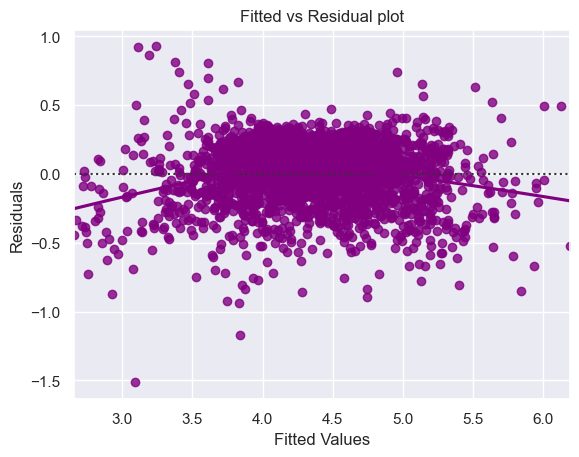

In [202]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observations

We see no pattern in the plot above.
Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY
We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

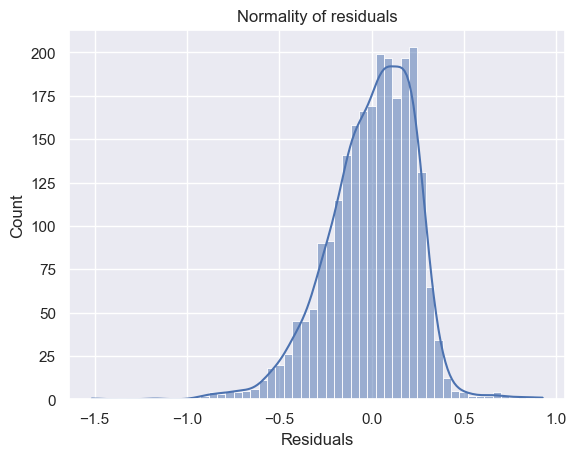

In [201]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

#### Observations

The histogram of residuals almost has a bell shape structure.
Let's check the Q-Q plot.

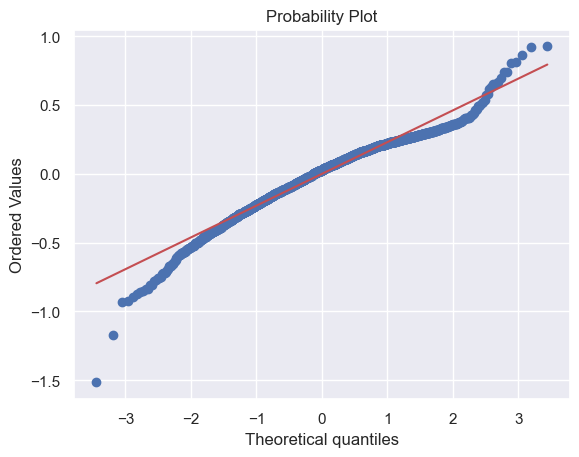

In [193]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations

The residuals almost follow a straight line.
Let's check the results of the Shapiro-Wilk test.

In [200]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9680168628692627, pvalue=8.993732498487648e-23)

#### Observations

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
However, based on the distribution plot and Q-Q plot, we can consider the distribution to be a good approximation of the normal distribution.
So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY
We will test for homoscedasticity by using the goldfeldquandt test.
If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [195]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.0450524245171078), ('p-value', 0.2264049845892881)]

#### Observations

Since p-value > 0.05, the residuals are homoscedastic.
So, the assumption is satisfied.

### All the assumptions of linear regression are satisfied. 
Let's rebuild our final model, check its performance, and draw inferences from it.

## Final Model Summary

## Final Model

In [196]:
olsmodel2 = sm.OLS(y_train, X_train5).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1042.
Date:                   Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                           14:46:01   Log-Likelihood:                 77.391
No. Observations:                   2417   AIC:                            -128.8
Df Residuals:                       2404   BIC:                            -53.51
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [197]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(
    olsmodel2, X_train5, y_train
)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234346,0.18324,0.838806,0.837934,4.407828


In [198]:
# checking model performance on test data set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(
    olsmodel2, X_test5, y_test
)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24162,0.187535,0.838138,0.836081,4.576213


## Actionable Insights and Recommendations 

Test performance result with R-squared at 0.838138 is close to the value from training performance at 0.838806, indicating the model works reasonably well for testing data, with good prediction potential to predict the price of the old device.

A unit increase in normalized_new_price increases the normalized_old_price by 0.4348 units, all other variables held constant. This demonstrates that the normalized_old_price depends largely on the normalized_new_price of the device, or normalized_new_price has the most significant influence over the normalized_old_price, comparing to other variables.

A unit increase in brand_name_Karbonn increases the normalized_old_price by 0.1213 units, all other variables held constant.

A unit increase in os_Others decreases the normalized_old_price by 0.1293 units, all other variables held constant.

Unit increases in main_camera_mp and RAM have similiar impact, both causing about 0.021 unit increase of the normalized_old_price, all other variables held constant.

4g and 5g have the opposite effect on the normalized_old_price, with 5g have a negative coef at -0.0609, 4g at 0.0456.

The weight has a very small impact on normalized_old_price due to a low coef of 0.0016, a bit suprise.

The big surpirse is with screen size, which is not even included in the model, its impact on the normalized_old_price is neligibal based on the model.
 

- 


___